# Basic info

Statistics: a branch of science that analyses data that was collected from a sample. 

**The Central Dogma of Statistics**: analysis of a small random sample enables drawing inferences about the entire population.
 
<img src="Media/Central_dogma_of_statistics.png" width="400"/>

Moments of distribution:
1. First moment: location (central tendency): evaluated by metrics
2. Second moment: variability (dispersion): evaluated by metrics
3. Third moment: skewness (inclination of the data towards smaller or larger values): evaluated visually; right-skewed - median is to the left of the mean (tail is on the right side, so the peak is to the left)
4. Fourth moment: kurtosis (tendency of a dataset to have extreme values): evaluated visually

Metrics can be:
- Univariate (univariate analysis) - look at one variable: mean, variance
- Bivariate: correlation
- Multivariate: contingency table, hexagonal binning, contour plot, violin plot

# Probability

> "... probability tells us how often something is likely to occur when an experiment is repeated..." (Sarah Boslaugh, Statistics in a Nutshell)

Probability theory describes what properties our sample should have, given the properties of the underlying population. **Probability** is the proportion of times an event would occur in infinite repetitions. 

Some important terms:
| Term | Definition | Example |
| - | - | - |
| **Trial** (experiment) | An event whose outcome is unknown. | |
| **Event (E)** | An outcome of a trial.| An event that the sum of the two die is 11, $E = \{(5,6), (6,5)\}$ |
| **Sample space** (S, set) | A set of all possible outcomes of a trial. | For a roll of a six-sided die, $S = \{1,2,3,4,5,6 \}$ |

Probability of an event is the number of desirable events divided by the number of sample space:
$$ P(E) = \frac{n(E)}{n(S)} $$

**Venn Diagram**

<img src="Media/Venn.png">

Datasets:
- $A = \{1,5,7,18\}$
- $B = \{1,7,18\}$
- $1 \in A$
- $2 \notin A$
- Subset: $B \subseteq A$

<u>Exclusivity of events</u>:

A and B are **mutually exclusive** (two events cannot occur at the same time). E.g. on a d6 die, P (even OR odd) $ = P(even) + P(odd) = 0.5 + 0.5 = 1 $

A and B are **not mutually exclusive** if they intersect - have some degree of overlap. On a d6 die, P(number>1 OR odd). 

<u>Independence of events</u>:

| Independent | Conditional |
| - | - | 
| Events are **independent** if P of one event is not affected by the occurrence of the other events. Two events are independent IF $P(A\cap B) = P(A)*P(B)$ and $P(B)=P(A)$. | Events are **conditional** (Bayes) when the two events are correlated.  |
| *Product rule of independent probabilities*: $p(E\cap F) = p(E)*p(F) $ | *Product rule of dependent probabilities*: $p(E\cap F) = p(E\| F) * p(F)$ |

In independent events, $ p(A|B) = \frac{p(A\cap B)}{p(B)} = \frac{p(A)p(B)}{p(B)} = p(A) $

Conditional probability of B given A:

$$ p(B|A) = \frac{p(B\cap A)}{p(A)} $$

The Bayes theorem (reverses the direction of the dependencies):
$$ p(A|B) = \frac{p(B|A)*p(A)}{p(B)} = \frac{p(B|A)*p(A)}{ p(B|A)p(A) + p(B|A_{c}) + p(A_{c}) } $$


*Rule of complementary probabilities* - for an event E, its complement ($E_{c}$) has the probability of 1 minus p of E: $p(E_{c}) = 1 - p(E)$


<img src="Media/Bayes.png" width="400px">

$ p(B\cap A) = p(B|A) * p(A) = 0.3*0.2 = 0.06 $

$ p(B|A) = 0.3 $

s

$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} = \frac{p(B|A) p(A)}{p(B|A) p(A) + p(B|A_{c}) + p(B|A_{c}) + p(A_{c})} = \frac{0.3*0.2}{0.3*0.2 + 0.05*0.8} = 0.6$

---

Odds that a team will win are 3 to 1 -> probability of winning = 3/(3+1) = 3/4

# Data Types

**Numerical (quantitative)** - numeric-scale data: 
- **Continuous**:  data that can take on any number within a range: height, weight; 
- **Discrete**: only integer values are possible: tablets in a bottle, rounded age; 

**Categorical (qualitative)** - data represented as specific values in categories. 
- **Nominal**: categories with no meaningful order: sex, occupation; 
- **Ordinal**: categories with a meaningful order: scale in a questionnaire, grades; 




# Measures of center

aka estimates of location, central tendency measures. 
 

| Measure | Description | Formula |
| - | - | - |
| **Arithmetic mean** | Very susceptible to outliers. Used in unipeak normally distributed data. $\mu$ (mu) - population mean, $\overline{x}$ (x hat) - sample mean | $$mean = \frac{ \sum_{i=1}^{n}x_{i} }{n}$$ |
| **Trimmed mean** | Dropping a fixed number $(p)$ of extreme values at both ends and then calculating mean. | $$trimmedMean = \frac{ \sum_{i=p+1}^{n-p}x_{i} }{n-2p}$$ |
| **Geometric mean** | $n-th$ root of the product of n values | $$x = \sqrt[n]{a_{1}a_{2}...a_{n}}$$ | 
| **Weighted mean** | the sum of all values times their weights divided by the sum of weights. | $$ weightedMean = \frac{ \sum_{i=1}^{n}w_{i}x_{i} }{ \sum_{i=1}^{n}w_{i} }$$ |
| **Median** | Middle score (number at the center) for the sorted dataset. Used in data with outliers or skewed data, as it is considered a robust estimate of location |  |
| **Mode** | The most frequent score in a dataset. Used in categorical data or in data with clusters. |  |


robust: not sensitive to extreme values. 

Outlier: a data value that is very different from most of the data. 

Expected value: mean value based on probabilities of occurrence of each category. 
- Calculated by multiplying each category (outcome) by its probability, and then sum the resulting values. 





In [ ]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({
	'Name': ['John', 'Jake', 'Lea', 'Eugene', 'Dan', 'John', 'Jake', 'Lea', 'Eugene', 'Dan'], 
	'Population': [100, 200, 300, 400, 500, 100, 200, 300, 400, 800]
})


df['Population'].mean()
df['Population'].median()
stats.trim_mean(df['Population'], 0.1) # Removes top and bottom 10%

# Measures of dispersion

Measures of spread / variability. 

| Measure | Description | Formula |
| - | - | - |
| **Range** | Max - min value in a dataset. | $$range = max - min$$ |
| **Midrange** | Range divided by two. | $$midrange = \frac{max+min}{2}$$ |
| **Quantile** | Quantiles cut points dividing the range of probability distribution into continuous interval with equal probabilities. Can be *quartiles* (4 groups), *deciles* (10 groups), *percentiles* (100 groups). |  |
| **Quartile** | Value cutting data into quarters. | <img src="Media/Quartile.png" width="300"/> |
| **IQR (interquartile range)** | The difference between the 75th and the 25th percentiles; the range btw the lower (Q1) and upper (Q3) quartiles. Excludes outliers. **Q1 (lower quartile)** - median of the left half of the dataset; **Q3 (upper quartile)** - median of the right half of the dataset. Q1-Q3 = 50% of the data. Outliers are data points that exceed the boundaries set by $Q1 - 1.5*IQR$ and $Q3 + 1.5*IQR$. Boxplot can be notched and include a 95%CI in the middle. | <img src="Media/IQR.png" width="300"/> |
| **Percentile** | Percentile P is a value such that P percent of the data lies below. E.g. score of 50 is in the 90th percentile, which means that this score is better than 90% of people. | $$rank = \frac{\# of values below x}{n} * 100$$ |
| **Mean deviation from the mean** | BAD METRIC! The average difference of each value from the mean. Not good because positive and negative values cancel each other out, therefore we lose the measure of dispersion in this dataset. | $$ x = \frac{ \sum_{i=1}^{n} (x_{i}-\overline{x}) }{n} $$ |
| **Mean absolute deviation** | The mean of the absolute (module) deviation from the mean. | $$MAD = \frac{ \sum_{i=1}^{n} \|x_{i} - \overline{x}\| }{ n }$$ |
| **Median absolute deviation from the median** | More robust. | $$MADM = median( \|x_{1}-m\|, \|x_{2}-m\|, ..., \|x_{N}-m\| )$$, where m - median |
| **Variance** | Mean of squared deviations. Measures how far a set of numbers is spread out from the mean. Units = squared units, so not super intuitive. | $$variance = s^{2} = \frac{ \sum_{i=1}^{n} (x_{i} - \overline{x})^{2} }{ n-1 }$$ <img src="Media/Variance.png" width="400"/> |
| **SD (standard deviation)** | Square root of the variance. Shows how much, on average, the values differ from the mean. Measures sum of squared differences between each value and the mean. | $$s = \sqrt{variance}$$ <img src="Media/SD.png" width="400"/> |
| **Coefficient of variation** | Used to compare multiple datasets. You can compare CV of two datasets. | $$CV = \frac{SD}{\overline{x}}$$ |
| **Covariance** | Tells us if 2 values move in the same direction. 0 - independent, >0 - move together, <0 - move opposite | $$COV = \frac{ \sum( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ (n-1) }$$ |

Variance, SD are sensitive to outliers. More robust metrics - mean absolute deviation, median absolute deviation from the median, and quantiles. 

.

> Example
> 
> dataset = [2, 2, 3, 4, 5, 6, 7]
> 
> Percentile rank of 4 = $3/7 * 100 = 43\%$
> 
> What's the index of X-th percentile? 
> 
> $index = \frac{percentile}{100} * (n+1)$, then you take that index (rounded to the closest int) of the dataset
> 
> E.g. at 25th percentile, the value is $= \frac{25}{100} * (7+1) = 2$ -> 2nd value (which is 2)
> 

In [ ]:
import pandas as pd

df['Population'].std()
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)
df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

# Distributions

**Sample** - a small subset of size $n$ from a larger dataset (**population**) of size $N$. 

Sample mean: $\overline{x}$ (x-bar) vs 

Population mean: $\mu$

**Random sampling** - a process where each datapoint in the population dataset has the same probability of being chosen; to reduce sample bias. 


Errors could be due to random chance (random, no tendency) and due to bias (when there is a tendency). 

Stratified sampling - splitting the population by group (e.g. age) and randomly obtaining samples from a certain stratum. 

**Bias** - (in statistics) a systematic error in measurement or sampling.

| Bias | Explanation | Example |
| - | - | - |
| Sample bias | The sample is meaningfully and non-randomly different from the underlying population from which it was drawn. | > 1936, *Literary Digest* poll vs George Gallup for predicting Alf Landon vs Franklin Roosevelt. |
| Selection bias | The sample is selectively chosen, which results in a misleading conclusion. | **Data snooping** - sorting through the data until some interesting pattern is found. "If you tortute the data long enough, sooner or later it will confess." **Vast Search Effect** - if different models and hypotheses are repeatedly run on a large dataset, sooner or later something will be found. **Regression to the Mean** - extreme observations, which very often are due to luck, tend to be followed by more central ones; example - "rookie of the year, sophomore slump" phenomenon in sports. |



**Data (population) distribution** - the frequency distribution of individual data points in the population (original) dataset. 

After we sample, we get **sampling distribution** - the frequency distribution of sample's statistic (e.g. mean) over many samples. 



**Confidence intervals**: a more accurate alternative to point estimates. 

CI are used to show variation in the sample distribution. As per the CLT, the more data you have the narrower the distribution and (presumably) the narrower the CI. 

$$ (x, y) = \overline{x} \pm Z_{ \alpha/2 } * \frac{ \sigma }{ \sqrt{n} } $$

90% CI: 9/10 of intervals contain mean. 

alpha: doubt = 1 - confidence. 

_**Example 1**_:

For $\alpha=0.05$, critical probability $= 1 - \alpha/2 = 0.975$. Check this critical probability in the Z-table, get Z-score of $Z = 1.96$. So, equation will be: $ (x,y) = \overline{x} \pm 1.96 * \frac{ \sigma }{ \sqrt{n} } $ 

_**Example 2**_:

Two groups of 100 people. Group 1 $\mu = 9.31$  ($S = 4.67$), group 2 $\mu = 7.40$ ($S = 4.04$). 

$\overline{x}_{1} - \overline{x}_{2} = 9.31 - 7.40 = 1.91$

$\alpha = 0.05$, two-tail, so $0.025$ from each end. Look up in the Z-table -> $Z = 1.96$. Interpretation - there is a 95% chance that the true mean of the difference of the sample lies within 1.96 SD within the x1 - x2. 

Calculate SD for the difference of sample means:

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}}^{2} = \sigma_{\overline{x}_{1}}^{2} + \sigma_{\overline{x}_{2}}^{2} = \sigma_{x_{1}}^{2}/100 + \sigma_{x_{2}}^{2}/100 $

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}} = \sqrt{ S_{1}^{2}/100 + S_{2}^{2}/100 } = 0.617$

$CI = 1.91 \pm 1.21$ - We are confident that there is a 95% chance that the true difference of the two samples lies between 0.7 and 3.12.  

_**Example 3**_:

We can calculate confidence intervals without the Z-table. 

For example, if we have a bootstrap sampling distribution, for an $x%$ CI you can trim $\frac{(100-x)}{2}$ from each end of the distribution, and the trim points define the bounds of the CI. 


In [ ]:
"""Confidence Intervals"""

import numpy as np, scipy.stats as st

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import


# create 95% CI for population mean weight
# sample_size < 30 -> t-distribution
data = player_data_import['height_inches'].sample(20)
a = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
print(a)
# the same but > 30 observations -> normal distribution
data = player_data_import['height_inches'].sample(1000)
b = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
print(b)


## Sampling distributions

**Central Limit Theorem** - <u>the sampling distribution (distributions of means from multiple samples) tends to adopt bell-shaped / normal curve with increasing the size of a sample, 
even if the underlying population distribution is non-normal </u>; additionally, with increasing sample size we get closer to the mean. 

**SE (standard error)**: represents variability in the sampling distribution, hence accuracy of the estimate. 

$$StandardError = SE = \frac{s}{\sqrt{n}}$$
, where $s$ - standard deviation of the samples, $n$ - sample size. 

With increasing sample size, SE decreases. 

**Bootstrap** - method to estimate sampling distribution. This is a way to get sample statistics from your data. First, we have a sample from a population (e.g. n=100). Then, from this sample, :
1. From the original sample, perform sampling with replacement: draw a subsample of size m (where after drawing each individual observation it is returned to the pool, so the same value / observation can be subsampled multiple times), record the mean, then return the subsample to the original sample ; here, m can be 100% of the original sample (e.g. m = n = 100), but if the sample is enormous, it can be 80% or 50%;  
2. Repeat step 1 R times; 
3. From the results from step 2, you can calculate SD / SE, find confidence interval. 

**Confidence intervals**:
- 90% CI is the interval within the central 90% of the boostrap sampling distribution; iow, an x% CI around a sample estimation should contain similar estimates x% of the time, on average; 
- Can be generated with bootstrapping. 



In [ ]:
"""
Data (population) distribution - right-skewed
"""

import seaborn as sns
# Generate Right-Skewed data set
from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

num_data_points = 10000
max_value = 100
skewness = 15   # Positive values are right-skewed

skewed_random_data = skewnorm.rvs(a = skewness,loc=max_value, size=num_data_points, random_state=1)  
skewed_data_scaled = MinMaxScaler().fit_transform(skewed_random_data.reshape(-1, 1))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Data Distribution", fontsize=24, fontweight="bold")

sns.histplot(skewed_data_scaled, bins=30, stat="density", kde=True, legend=False, ax=ax)
print(skewed_data_scaled)

In [ ]:
"""
SAMPLING DISTRIBUTION

the underlying population distribution is right-skewed, however, the sampling distribution is more normally distributed and bell-shaped. 

As per the Central Limit Theorem, the sampling distribution is bell-shaped. 
"""

import random
import statistics

# SAMPLING DISTRIBUTION

N = 100000

samples_mean = []
for i in range(2000): # 100 samples
	# pick k random items from a list
	sample = random.sample(skewed_data_scaled.tolist(), k=100)
	samples_mean.append(np.mean(sample))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Sampling Distribution", fontsize=24, fontweight="bold")
num_bins = 20
sns.histplot(samples_mean, bins=30, stat="density", kde=True, legend=False, ax=ax)



In [ ]:
import pandas as pd, matplotlib.pyplot as plt
import random

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

"""Central Limit Theorem"""
# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import

# Different sample sizes - 10, 30, 50, etc.
sample_amounts = range(10, 100, 20)
#
for x in sample_amounts:
	samples = []
	# For each sample size, resample 1000 times and plot a distribution
	for i in range(1000):
		samples.append( player_data_import['height_inches'].sample(x).mean() )
		# samples.append(player_data_import['height_inches'].sample(x).mean()[0])
	plt.hist(samples)
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title('Central Limit Theorem')

In [ ]:
# Bootstrapping

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
	# In this case, we resample 100% of the dataset = the same size as the original, but with possible repetitions
	sample = resample(player_data_import['height_inches'])
	if nrepeat == 1: print(sample) # Just to show one of the samples
	results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap statistics:")
print(f" - original: {player_data_import['height_inches'].mean()}")
print(f" - bias: {results.mean() - player_data_import['height_inches'].mean()}")
print(f" - std. error: {results.std()}")

## Normal distribution

**Normal (Gaussian) distribution**: 
- A continuous, unimodal, symmetrically-distributed bell-shaped distribution, with mean = median = mode; 
- It is completely parameterised by its mean (mu, $\mu$) and SD (sigma, $\sigma$); 
- Normal distribution implies tight bounds on the probability lying far from the mean = 68-95-99.7 empirical rule: 68% of the values must lie within 1SD of the mean, 95% within 2SD, 99.7% within 3SD. Mu and sigma can be any as long as the 68-95-99.7 rule holds; 
- **Standard normal distribution** (z-distribution): special case of normal distribution where $\mu$ = 0, $\sigma$ = 1. 




| Normal distribution |
| - |
| <img src="Media/normal-distribution.png" width="430"/> |


Six sigma - term used to connote quality standards so high that defects are incredibly rare events (e.g. plane crashes). Probability of 6σ event on the normal distribution is 2 parts per billion. 

Normality assessment: 
- Visual: 
  - QQ-Plot: plot that visualises closeness of sample distribution to a specified one. 
  - Histograms; 
- Statistical ($H_{0}$ (null): (in case of p > 0.05) the values are sampled from a population that follows a normal distribution; $H_{A}$: (in case of p <= 0.05) reject null hypothesis - assume non-normal distribution):
  - D'Agostino-Pearson
  - Kolmogorov-Smirnov
  - Anderson-Darling
  - Shapiro-Wilk

Standardisation / normalisation: 
- **Z-score** measures how many SD away from the mean a given score is:
- subtraction of the mean from a data point and division by the SD. 
- Z-score is the result of standardizing individual data values. Z table - standard normal table; what proportion is less than that amount (that SD) in a normal distribution. 
- Below, $x$ - score, $\mu$ - mean, $\sigma$ - SD. If we are figuring out Z-score of a sample, <u>use SE (standard error) instead of SD</u>

$$ Population: Z = \frac{x - \mu}{\sigma}; $$
$$ Sample: Z = \frac{x- \overline{x}}{SE} $$

In [ ]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

a = np.linspace(12, 18, 100)
# print(a)

def equation(x: list):
	# Mean
	mean = np.mean(a)
	# SD
	sum = 0
	for i in a:
		sum += (i - mean)**2
	SD = ( sum / (len(a)-1) )**0.5
	# return SD
	leftPart = 1 / ( SD * (2*np.pi)**0.5 )
	rightPart = np.e**( -((x-mean)**2) / 2*(SD**2) )
	return leftPart*rightPart

sns.lineplot( x=a, y=equation(a) )

equation(a)



In [ ]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.title('Probability (QQ) plot for normally-distributed data')



In [ ]:
# still roughly normal

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = player_data_import['height_inches'].sample(1000)
stats.probplot(norm_sample, plot=ax)

## Long-tailed

E.g. distribution of household incomes = right-skewed graph, as the tail is on the right. 



## Student's t-distribution 

A normally shaped distribution that is thicker and has longer tails.  

We can use t-distribution if our sample size <u>is less than 30</u>, otherwise we can assume normal distribution as per the CLT. 

Also called Student's t distribution (1908, *Biometrica*, W.S.Gosset aka Student).

<img src="Media/z-t-distributions.png" width="430"/>

90% CI around the sample mean: 

$ \overline{x} \pm t_{n-1}(0.05) \frac{s}{\sqrt{n}} $

, where $n$ - sample size, $t_{n-1}(0.05)$ is the t-statistic value with n-1 degrees of freedom, "excluding" 5% distribution at the two ends. 

## Bernoulli distribution

- Bernoulli event (trial, experiment): even with only two outcomes - success (X=1) and failure (X=0). 
- The Bernoulli distribution represents the success or failure of a single Bernoulli trial. 

$P(X=1) = p$

$P(X=0) = q = 1-p$

<img src="Media/Bernoulli_distribution.png" width="300"/>


## Binomial distribution

- Two independent trials with outcomes P1 and P2, with probabilities p and q=(1-p)
- Binomial distribution reports the probability of getting exactly $x$ P1 events in the course of $n$ independent (probability of event does does not depend on how many times it has previously been used) Bernoulli trials. Binomial experiment = repeat Bernoulli event N times. Distribution of successes in n trials. 
- The binomial distribution is defined by only two parameters - p and n. Binomial distribution for coin flip - bell-shaped; but this is not necessarily always the case. 

Formula for probability:

$$ P(x) = {n \choose x} p^{x} q^{n-x} = \frac{n!}{(n-x)!x!} p^{x} q^{n-x} $$
, where $p$ - probability of success, $q=1-p$ - probability of failure, $n$ - total number of trials, $x$ - number of successes, $n-x$ - number of failures. 


A random variable is binomial if:
- The outcome of each trial has only two options (e.g. success or failure)
- Each trial is identical and independent of the others (result of one trial doesn’t affect the results of the other subsequent trials)
- There is a fixed, clearly-defined number of trials
- The probability p of success on each trial remains constant


<img src="Media/Binomial-distribution.png" width="800"/>

x-axis, number of heads in 200 coin flips. 


> Example: 80% of business startups generate a profit in their first year. Find the probability that in a sample of 10 startups, 7 will generate a profit in their first year. 
> 
> $$P(x=7) = {10 \choose 7} * 0.8^{7} * 0.2^{10-7} = 0.2013$$ 

In [ ]:
# The Probability Mass Function (PMF) - probability that an event will happen a certain number of times, given a certain number of samples and probability for success; 
# Cumulative Density Function  - probability that an event will happen a certain number or fewer times
stats.binom.pmf(2, n=5, p=0.1) 
stats.binom.cdf(2, n=5, p=0.1)
# 2 = number of successes
# 5 = number of trials
# probability of clicking once (in each trial) = 0.1


## Other distributions

- Chi-Square distribution
- Poisson
- Power law: $y = x^{constant}$
- Exponential distribution: $y = (constant)^{x}$
- F-distribution
- Weibull distribution

<img src="Media/Exponential-vs-powerlaw.jpg" width="500"/>


# Hypothesis testing

- Null hypothesis: no difference, and any difference between the groups is random; 
- Alternative hypothesis. 

<u>Hypotheses can be tested (and p-values obtained) by two methods</u>:
1. t-test etc.; 
2. randomization inference; 

Resampling: 
- Bootstrap; 
- Permutation (**to obtain p-values**):
  - Exhaustive permutation test: consider every possible permutation of the data;  
  - Random permutation (randomization): take a sample - perform randomisation R times; 
  - Bootstrap permutation test. 


Statistical significance:
- p-value: probability of obtaining results more or as extreme as the observed results by chance. E.g. in permutation test, it is the proportion of times permutation test produced a resulting difference that was equal or greater than the experimental difference. 
- alpha: a threshold of the result being considered extreme. Significance level. Typically, 0.10, 0.05, 0.01. If p-value <= alpha, reject H0; if p-value > alpha, do not reject H0; 
- Type 1 error (false positive): rejecting H0 when it's true; saying effect is real (when really it's due to chance)
- Type 2 error (false negative): not rejecting H0 when it's false; saying effect is due to chance (when really it's real)


<img src="Media/False_positive_etc.png" width="500">

Multiple testing:
- Alpha inflation: alpha (probability of commiting a type 1 error) increases with increasing number of tests. 
- Adjustment of p-values: adjustment for multiple tests. E.g. Bonferonni adjustment/correction, Tukey's HSD (honest significance test)
- **Bonferroni correction**: when testing n different hypotheses simultaneously, the resulting p-value must rise to a level of $\alpha/n$, in order to be considered as significant at the $\alpha$ level. Essentially, <u>divide the alpha by the number of comparisons</u>

ANOVA:
- Performs a single overall test showing whether there is a difference between multiple variables, with a single p-value; 
1. Combine all data; 
2. Shuffle, draw out resamples (the same amount of resamples as the original number of groups); 
3. Calculate mean of each of the resample and then calculate variance btw the groups, record the variance;  
4. Repeat steps 2-4 lots of times (1000x); 
5. p-value = proportion of times when the variance of resamples exceed or equals to the observed variance; 



## Statistical tests

**Independent samples** – subjects in one group do not provide info about subjects in the other group. They can’t be paired. E.g. medication trial has a control and a treatment group consisting of different individuals. **Dependent samples** – e.g. training program taking pretest and posttest scores from the same group of people. 


| Compare / measure what? | Example | Parametric test | Non-parametric test |
| - | - | - | - |
| Central tendency | Where is the center? | Mean | Median / mode |
| Measure of spread || SD | Quartiles and IQR |
| Compare sample mean to a known population mean | hypothesis test about a population mean, e.g. collected birth weights of people with SIDS, want to know whether the obtained average birth-weight of SIDS subjects is different from the national average of 3300g. | One-sample t-test | Wilcoxon test, sign test |
| Measure one group at two different times; dependent groups - 1 variable, 2 categories, within-subjects | Examine students' diagnostic test results before and after studying. E.g. insulin rate in 30 patients before and after the medical treatment. Every patient is associated with two measurements. | Paired t-test | Wilcoxon signed-rank test, Wilcoxon Rank sum test |
| Compare means between 2 independent groups (1 variable, 2 categories, between subjects) | Do male managers have higher average salaries than the female managers? | Unpaired t-test (independent samples t-test) | Mann-Whitney U test |
| Compare means between 3+ independent groups (1 variable, 3+ categories, between subjects) | Is there a difference in crop yield if a farmer uses fertiliser A, B, or C? | One-way ANOVA | Kruskal-Wallis test (Kruskal-Wallis H test) |
| 1 variable, 3+ categories, within-subjects || repeated measures ANOVA | Friedman test, ANOVA on ranked data |
| Estimate the degree of association between two variables | Does the number of hours a person spends on social media affects the number of hours they sleep at night? | Pearson correlation coefficient | Spearman's rank correlation |



## Random permutation test

By re-randomising the results, you could tell the probability of obtaining the results you got just by random chance.

1. Combine the results from different groups into one dataset; 
2. Randomly draw resamples into groups of the same size as the original ones; 
3. Calculate statistic for the resamples; 
4. Repeat step 3 R times; 
5. Draw a permutation distribution of the test statistic.
6. If the observed difference lies within the set of permuted differences, then the observed difference is within the range that is produced by random chance. If it lies outside of the most of permutation distribution, -> conclude that the difference is not by random chance -> statistically significant. 

> **Example (from Khan academy)**:
> 
> Giovanna usually takes bus B to work, but she thinks but A can be faster. 
> 
> She randomized 50 workdays between two groups: treatment (bus A) and control (bus B)
> At the end of the 50 days, she recorded $median(A) - median(B) = -8$, meaning that the median travel duration for bus A is 8 minutes less than that for bus B, from this experiment.
>  
> To test whether the results could be explained by random chance, she performed 1000 re-randomizations of data (where she took the results from those 50 days, redistributed them into the two groups randomly, calculated the difference of medians, and then performed the whole procedure again 1000 times). 
> Below is the table of re-randomization results (rounded values):
> 
> According to the simulations, what is the probability of the treatment group's median being lower than the control group's median by 8 minutes or more? 
> 
> From the table below, we calculate that the frequency as extreme as the obtained result or more is $(8+85)/1000 = 0.093$, meaning that probability of obtaining the same or more extreme result by random is 9.3% - the result is not statistically significant. 

| $median(A) - median(B)$ | Frequency |
| - | - |
| -10 | 8 |
| -8 | 85 |
| -6 | 97 |
| -4 | 161 |
| -2 | 83 |
| 0 | 127 |
| 2 | 93 |
| 4 | 159 |
| 6 | 107 |
| 8 | 62 |
| 10 | 18 |




In [ ]:
# random Permutation test
import numpy as np, random
import matplotlib.pyplot as plt, seaborn as sns

# AB test
groupA = [15, 16, 17, 19, 16, 18]
groupB = [19, 21, 17, 22, 22, 21]
# Original difference
difference = np.mean(groupB) - np.mean(groupA); print(difference)

# combine results
combined_results = groupA + groupB; print(combined_results)
# Perform numerous tests
permutation_diffs = []
for i in range(10000):
	# shuffle
	random.shuffle(combined_results); 
	# Draw two resamples
	resampleA, resampleB = combined_results[:len(groupA)], combined_results[len(groupA):]
	# print(resampleA)
	# print(resampleB)
	permutation_diffs.append(np.mean(resampleB) - np.mean(resampleA))


# print(permutation_diffs)

sns.histplot( x=permutation_diffs, bins=30 )
plt.title('Distribution of permutation test results')
plt.xlabel('Resamples differences')
plt.ylabel('Frequency')

plt.axvline(difference, color='red', linewidth=2, ls='--')
plt.text(difference, 8, "observed\ndifference", bbox={'facecolor':'white'})

# How many times (what percentage of cases) do we observe the observed difference by chance?
difference_chance = np.mean( permutation_diffs >= (difference) )
print(f"Observed difference between group A and group B: {difference}")
print(f"We find the difference that is the same or better, but by random chance, in {difference_chance * 100}% cases")
p_value = difference_chance
print(f"Statistically significantly group B is higher than group A: {p_value < 0.05} (p = {p_value})") 
# If true, then the observed difference btw groups is outside range of variation by random chance and is statistically significant


## Student's t-test

> E.g. to determine if means of two sets of data are significantly different from each other. 

- One-sample t-test: compare sample mean to population mean
- Independent two sample t-test: compare means of two independent groups
- Paired samples t-test: compare mean of a group before and after a treatment. 

$S$, standard deviation. 

$$ t = \overline{x} \pm t_{\alpha/2} * \frac{ S }{ \sqrt{n-1} } $$

_**Example of one sample t-test**_:
- Mean to test: 65000, 95% confidence
- Sample: $\overline{x} = 62456.2$, $S = SD = 2418.4$, $n=30$, $\alpha = 0.05$
- Look up in the t-table: for 29 DoF and alpha = 0.05, $t = 1.699$, therefore, interval is $(x,y) = 62456.2 \pm 1.699 * \frac{2418.4}{ 5.39 } = (61693.89, 63218.51)$


<img src="Media/t-test.png" width="500">


## A/B testing

Check which of the two treatments (control or treatment) is better.

Test statistic (metric) - such as conversion / no conversion. 

## Chi-Square test

For chi-square test, the number of each expected observation needs to be at least 5. 

Experimental data:
| Action | Headline A | Headline B | Headline C |
| - | - | - | - |
| Click | 14 | 8 | 12 |
| No-click | 986 | 992 | 988 |

Step 1. Rewrite contingency table with expected values for each group:

$mean(click) = 11.33$

$mean(no-click) = 988.67$

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 11.33 | 11.33 | 11.33 |
| No-click | 988.67 | 988.67 | 988.67 |

Step 2. Calculate Pearson residual and the chi-square statistic: 

$R = \frac{observed-expected}{\sqrt{expected}}$

Pearson residuals:

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 0.792 | -0.990 | 0.198 |
| No-click | -0.085 | 0.106 | -0.021 |

$$ X = \sum_{i}^{r} \sum_{j}^{c} R^{2} = \sum (\frac{(observed-expected)^{2}}{expected}) $$ 
, r and c - numbers of rows and columns. 

X = 1.666. 

Steps 1 and 2 we did once for our experimental data. Now for resampling: 

Step 3. Repeat steps 1 and 2 1000x times, each time record the X statistic. 

Step 4. Calculate p-value and check where the observed X statistic is on the sampling distribution of X resamplings; 

In [ ]:
import random, numpy as np

box = [1] * 34
box.extend([0] * 2966)

random.shuffle(box)

def chi2(observed, expected):
	""" Returns X^2 for a given column """
	pearson_residuals = []
	for row, expect in zip(observed, expected):
		pearson_residuals.append([(observe - expect)**2 / expect for observe in row])
	# Return the sum of squares
	return np.sum( pearson_residuals )

# First, calculate X^2 for observed data
expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks

expected = [ 34/3, 1000 - 34/3 ]
chi2observed = chi2( [[14,8,12], [986,992,988]], expected )
print(f"X^2 observed: {chi2observed:.4f}")

def perm_fun(box):
	sample_clicks = [sum(random.sample(box,1000)), sum(random.sample(box,1000)), sum(random.sample(box,1000))]
	sample_noclicks = [1000-n for n in sample_clicks]
	return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for i in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f"resampled p-value: {resampled_p_value:.4f}")

## Fisher's exact test

While chi-square applies an approximation, Fisher's exact test enumerates all possible permutations and gives an exact p-value. 

# AI

_**AI**_: the set of tasks in which a computer can "think" to make decisions. 

_**ML**_: part of AI; an algorithm which, <u>based on data</u>, creates rules to then make decisions based on the data / previous experience. 

_**Deep Learning**_: the field of ML that uses objects called Neural Networks. NN are modelled after NOT after the way the brain works, but after the organisation of neurons. 

**History**:
- The term "AI" was coined in 1956 at Dartmouth College conference; 
- 1974 - 1980: AI winter
- 1980-1987: boom
- 1987 - 1993: the second AI winter
- AI revolution: 
  - 1997: Deep Blue beat the chess champion Garry Kasparov; 
  - Two reasons: computing power and data (due to the internet and social media)

**First versions**:
- 1958 - perceptron - first supervised ML machine: classified trinagles and circles by Frank Rosenblatt. 

The **Remember-Formulate-Predict** framework of ML:
1. Remember: read data / experience; 
2. Formulate: create a model by establishing some rules; 
3. Predict: use the model to predict future data; 

Basic terms and definitions: 

| Term | Definition |
| - | - |
| Feature | Any property / characteristic of the data that the model can use to make predictions. |
| Label | A special feature that a ML model predicts from the other features. |
| Labeled data | Data that contains a special feature - label - that we aim to predict. | 
| Unlabeled data | Doesn't contain this special feature. |
| Model | A set of rules that represent our data and can be used to make predictions, e.g. to predict a label from features. Models are built by different algorithms. |
| Prediction | An output of a model. |
| $\hat{y}$ | A predicted label. |



<u>Branches of AI</u>:
- **ML**: 
  - **Supervised**: works with labelled data. Types of supervised ML models:
    - **Regression models**: predict numerical data. Output (label) - number. Examples: linear regression, decision trees for regression, ensemble methods (Random forest). 
    - **Classification models**: predict categorical data. Output (label) - category (state). Examples: discrete perceptron, continuous perceptron (logistic classifier), naive Bayes, decision trees for classification, neural networks, SVM, ensemble methods. 
  - **Unsupervised**: Branches:
    - **Clustering**: can be used to reduce the number of rows. Examples include K-means clustering, hierarchical, Gaussian mixture model. 
    - **Dimensionality reduction**: can be used to reduce the number of columns. 
    - **Generative learning**: models that, given a dataset, can output new data points that look like the original dataset. Examples: generative adversarial networks (GANs) - Ian Goodfellow; variational autoencoders; restricted Boltzmann machines. 
  - **Reinforcement**: no data given to the model - model receives an environment with rewards and punishments. 
- **Deep Learning**: uses Neural Networks; a sub-branch of ML. 
- **Computer Vision**: a large area of ML classification. 
- **NLP**
- **Robotics**

<u>ML frameworks in Python</u>:
- Scikit-learn
- Pytorch
- Keras
- TensorFlow

In [ ]:
loan200 = pd.read_csv('example_datasets/load200.csv')
loan200



# Data preprocessing

| Technique | Description | Application | Picture |
| - | - | - | - |
| **Imputation** | Handling missing values. | If 70% of the data is missing - drop the column; if less, can drop rows or substitute. Else - imputation, e.g. with the median value for the feature. | |
| **Binning** | Converting continuous feature to categorical. | Binning is useful when your data is noisy, i.e. lots of values weren't recorded precisely. Also, it can be useful to prevent the model overfitting the data. However, you lose information. | |
| **One-hot encoding** | Transform categorical nominal features to where each unique category from the feature is spread out to column name. | It's used to prevent the learning algorithm from assigning values to the feature categories, which may make it seem as if one feature is "greater" than the other. | <img src="Media/one-hot-encoding.png" width="600px"> |


# Reinforced ML


Features / independent variables ($X$) and labels / dependent variables ($y$). 

**Supervised ML**:
- learning with training labels
- <u>adsf</u>: 
- Logistic regression; 
- Linear discriminant analysis (LDA); uses Bayes' theorem. 
- K-nearest neighbours (KNN): parameter K can alter accuracy; 



**Unsupervised ML**:
- Learning without training labels. Cannot calculate accuracy scores. 
- Types:
- K-means; 
- Hierarchical clustering; 
- Subclusters

**Reinforcement learning**:
- learning from feedback. 

In [57]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Some datasets

boston = datasets.load_boston()
# features / labels
X, y = boston.data, boston.target
print(X.shape, y.shape)
print(X, y)

(506, 13) (506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 1

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

## Activation functions

**Step function**

returns a boolean

**Sigmoid function** ($\sigma$)

Below is the sigma function. Both are equivalent, but the one with $e^x$ in the numerator behaves better with small floating point numbers. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

$$ \sigma(x) = \frac{ e^{x} }{1 + e^{x}} $$

**Tanh (Hyperbolic tangent)**

<img src="Media/tanh.png" width="200px">

**Softmax**

**Rectified linear unit (ReLU)**

<img src="Media/relu.png" width="200px">

In [90]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

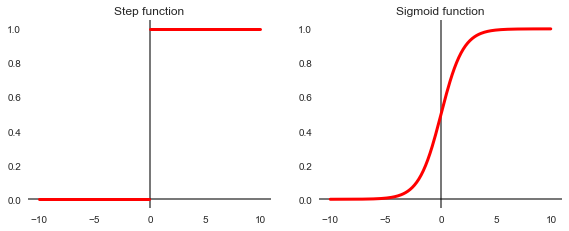

In [102]:
fig = plt.figure(figsize=(20,20))
sns.set_style('white', {
	'axes.spines.left':False,
	'axes.spines.right':False,
	'axes.spines.top':False,
	'axes.spines.bottom':False
})
sns.despine()
min_x, max_x = -10, 10

# Step function
ax = fig.add_subplot(5,4,1)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
x1 = np.arange(min_x, 0, 0.1)
x2 = np.arange(0, max_x, 0.1)
sns.lineplot( x=x1, y=0, color='red', linewidth=3 )
sns.lineplot( x=x2, y=1, color='red', linewidth=3 )
plt.title('Step function');

# Sigmoid function
ax = fig.add_subplot(5, 4, 2)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
x1 = np.arange(min_x, max_x, 0.1)
# x2 = np.arange(0, 5, 0.1)
sns.lineplot( x=x1, y= 1/(1+math.e**(-x1)) , color='red', linewidth=3 )
plt.title('Sigmoid function');

## Error functions

The same as loss functions?

**Absolute error**

$$ error = \sum(y-\hat{y}) $$

**Mean absolute error**

$$ error = \frac{ \sum_{i=1}^{n} abs(y_{i}-\hat{y}) }{ n } $$

**Square error**

$$ error = \sum (y-\hat{y})^2 $$

**Log loss**

A much more popular function. Uses probability. 

$$ LogLoss = -(y) ln(\hat{y}) - (1-y) ln(1 - \hat{y}) $$

## Accuracy metrics

Precision, recall, F-score, sensitivity and specificity, ROC curve (receiver operating characteristic). 

Accuracy: the percentage of times that a model is correct. 

$$ a $$

---
**False positive/negative**

- False positive (FP): a person is incorrectly classified as sick (positive lael), but is healthy (negative label).
- False negative (FN): a person is incorrectly classfied as healthy, when they are sick. 
- True positive (TP): sick person diagnosed as sick. 
- True negative (TN): a healthy person diagnosed as healthy. 

---

**The Confusion matrix**:

| Actual label | Classifies as `1` | Classifies as `0` | Total |
| - | - | - | - |
| It is `1` | **8** (TP) | **17** (FN) | 25 |
| It is `0` | **2** (FP) | **73** (TN) | 75 |
| Total | 10 | 90 | 100 |

$accuracy = \frac{TP + TN}{totalCases} = \frac{8+73}{100} = 81\% $

**Recall (sensitivity; true positive rate)**: the capacity of the test to identify the positively labeled points. finds the proportion of correct predictions among the data points with the positive label. <u>Used for high recall models, where false negatives are much more expensive / harmful than false positives.</u> 
$$ Recall = \frac{TP}{TP + FN} $$

**Precision**: measures how well the model does with false positives. Out of data points classified as positive (1 label), how many are actually positive? <u>High precision models - models in which false positives are much more expensive / harmful than false negatives.</u>
$$ Precision = \frac{TP}{TP + FP} $$

**Specificity (true negative rate)**: the capacity of the test to identify the negatively-labeled points. 
$$ Specificity = \frac{TN}{TN + FP} $$

---

**The F-score**:

F-score is a metric that combines recall and precision. 

$F_{\beta}-score$

We need a metric that is like an average but that is closer to the minimum value of the two - *a harmonic mean*. 

$$ mean_{harmonic} = \frac{2ab}{a+b} $$

$F_{1}-score$ - the harmonic mean between the precision ($P$) and the recall ($R$):

$$ F_{1} = \frac{2PR}{P+R} $$

If one of the numbers is much lower than the other, the $F_{1}-score$ will be low and closer to the lower value. 

We can use $F_{\beta}$ is we care more about FP or FN. We use the parameter $\beta$ to finetune our metric to put more emphasis on recall or precision: 
- $\beta = 0$, we get full precision; 
- $\beta = 0.1$, we give more weight to precision; 
- $\beta = 1$, we consider recall and precision equally; 
- As $\beta$ is larger than 1 (for example, 2), we give more weight to recall; 
- $\beta = \inf$, we get full recall. 
- IOW, the lower the value of $\beta$, the more we emphasize precision, and the higher the more we emphasize recall. 

$$ F_{\beta} = \frac{ (1+\beta^{2})PR }{ \beta^{2}P+R } $$

---

**The ROC curve**:

The receiver operating characteristic curve. 

It's a way to optimise sensitivity and specificity in a model. 




## Linear regression

### 1

In [60]:
import numpy as np, pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns

In [61]:
# Some datasets

boston = datasets.load_boston()
# features / labels
X, y = boston.data, boston.target
print(X.shape, y.shape)
print(X, y)

(506, 13) (506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 1

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

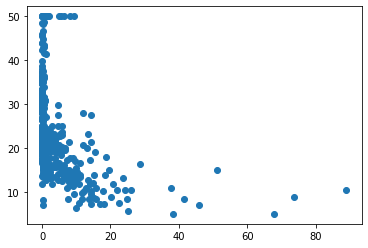

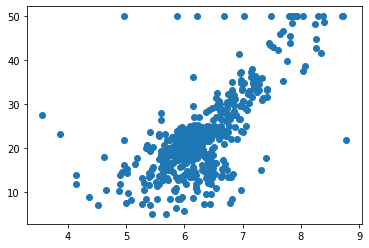

In [62]:
# create model
l_reg = linear_model.LinearRegression()

# visualise the data
# this scatterplot is for the first feature
plt.scatter( X.T[0], y )
plt.show()
# fifth feature - appropriate for linear regression
plt.scatter( X.T[5], y )

In [63]:
# separate data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train our model
model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
# print("Predictions: ", predictions)
print("R^2 value: ", l_reg.score(X,y))
print("Coefficient: ", l_reg.coef_)
print("Intercept: ", l_reg.intercept_)

R^2 value:  0.7383874072809751
Coefficient:  [-9.10092166e-02  4.26346187e-02 -9.81717098e-03  2.03164807e+00
 -1.48183432e+01  4.09391973e+00 -6.26652893e-03 -1.38097266e+00
  2.79252528e-01 -1.29773902e-02 -8.93679273e-01  9.78706153e-03
 -4.62758953e-01]
Intercept:  32.04440984290534


### 2

In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [4]:
# load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.columns)
print(dftrain.shape)
dftrain.head()


Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')
(627, 10)


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
y_train, y_eval = dftrain.pop('survived'), dfeval.pop('survived')


KeyError: 'survived'

<AxesSubplot:>

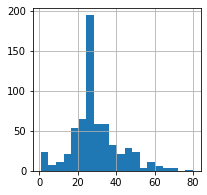

In [7]:
dftrain['age'].hist(bins=20, figsize=(3,3))

<AxesSubplot:>

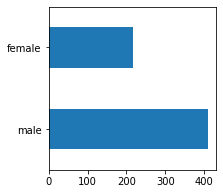

In [8]:
dftrain['sex'].value_counts().plot(kind='barh', figsize=(3,3))

In [9]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
	vocabulary = dftrain[feature_name].unique()
	feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
	feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [21]:
# Epoch - the number of times the model will see the dataset. 

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs) # Split the dataset into batches of 32 and repeat process for number of epochs
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns);
linear_est.train(train_input_fn);
result = linear_est.evaluate(eval_input_fn);

# clear_output() # clear console output
print(result['accuracy'])
print(result)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmpob29ujqg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [33]:
result = list( linear_est.predict(eval_input_fn) );

i = 2
probability_survival = result[i]['probabilities'][1]
probability_death = result[i]['probabilities'][0]
print(dfeval.loc[i])
print(f"Actual survivability: {y_eval.loc[i]}")
print(f"Probability of survival: {probability_survival:.3f}")
print(f"Probability of death: {probability_death:.3f}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmpob29ujqg\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
Actual survivability: 1
Probability of survival: 0.535
Probability of death: 0.465


## Discrete perceptron

Returns boolean. 

To calculate the output, the discrete perceptron uses the step function. 

### 1 (by hand)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df.head()

,feature 1,feature 2,label
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


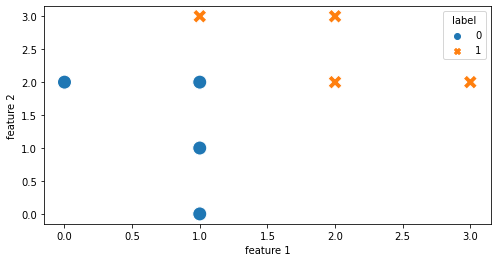

In [6]:
plt.figure(figsize=(8,4));
sns.scatterplot( 
	df['feature 1'], df['feature 2'], 
	style=df['label'], 
	s=200, 
	hue=df['label']
	# markers={'feature 1':'s', 'feature 2': 'X'}
);


In [11]:
# Coding the perceptron trick

def score(weights, bias, features):
	return np.dot(features, weights) + bias 

def step(x):
	if x >= 0:
		return 1
	else:
		return 0

def prediction(weights, bias, features):
	return step(score(weights, bias, features))

def error(weights, bias, features, label):
	pred = prediction(weights, bias, features)
	if pred == label:
		return 0
	else:
		return np.abs( score(weights, bias, features) )

def mean_perceptron_error(weights, bias, features, labels):
	total_error = 0
	for i in range(len(features)):
		total_error += error(weights, bias, features[i], labels[i])
	return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred) * features[i] * learning_rate
	bias += (label-pred) * learning_rate
	return weights, bias

def perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200):
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	cumulative_weights_bias = []
	for epoch in range(epochs):
		error = mean_perceptron_error(weights, bias, features, labels)
		errors.append(error)
		i = random.randint(0, len(features)-1)
		weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
		cumulative_weights_bias.append([ weights, bias ])
		# Draw a graph
		datapoints = np.arange(0, 4, 1)
		a = weights[0]
		b = weights[1]
		c = bias
		sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , alpha=0.05, color='grey'  )
	return weights, bias, cumulative_weights_bias, errors



0.49999999999999956
0.06999999999999934
-0.6700000000000004


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

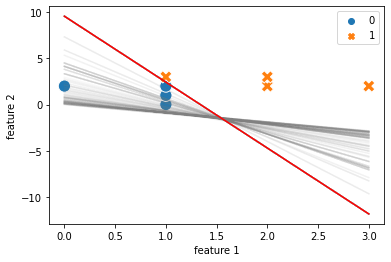

In [14]:
# Plot
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=150, 
	hue=df['label'], 
	# markers={'feature 1':'s', 'feature 2': 'X'}
)

output = perceptron_algorithm(features, labels)
a = output[0][0]; print(a) # "a" is the weight for x-axis feature
b = output[0][1]; print(b) # "b" is the weight for y-axis feature
c = output[1]; print(c)

datapoints = np.arange(0, 4, 1)
sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , color='red'  )

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

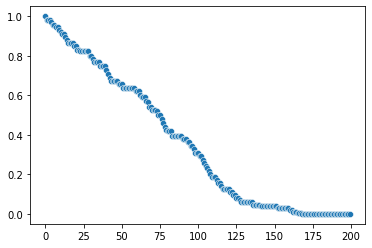

In [16]:
# Errors

errors = output[-1]
# print(errors)

sns.scatterplot( np.arange(0, len(errors), 1), errors )


### 2 

In [17]:
import numpy as np, pandas as pd
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

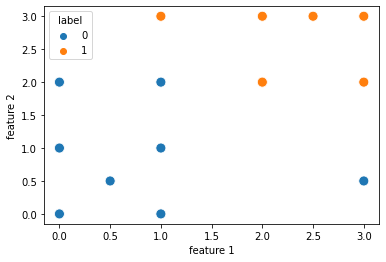

In [18]:
# Let's stay that we start with vectorised data
# First, let's convert it to a Pandas dataframe

features = np.array([[3,0.5],[0.5,0.5],[0,0],[0,1],[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2],[3,3],[2,2],[2.5,3]])
labels = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100 )

In [19]:
# Next, let's vectorise the data from Pandas dataframe back into a vector

X = df[['feature 1', 'feature 2']].values
print(X)
y = df['label'].values
print(y)

[[3.  0.5]
 [0.5 0.5]
 [0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  2. ]
 [1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [2.  2. ]
 [2.  3. ]
 [3.  2. ]
 [3.  3. ]
 [2.  2. ]
 [2.5 3. ]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% of data is for testing 
print(X_train)
print(y_train)

# Train the model
model = Perceptron()
model.fit( X_train, y_train )

# Make predictions on the test portion of the data and calculate the accuracy
predictions = model.predict( X_test )
accuracy = metrics.accuracy_score( y_test, predictions )
print(predictions)
print(f"Accuracy: {accuracy}")

# Make a prediction of a certain value
a = [[1,1]]
print("predicted value: ", model.predict(a))



[[0.  1. ]
 [1.  1. ]
 [2.  3. ]
 [0.5 0.5]
 [3.  0.5]
 [1.  2. ]
 [3.  2. ]
 [2.  2. ]
 [2.  2. ]
 [0.  2. ]
 [1.  0. ]
 [1.  3. ]]
[0 0 1 0 0 0 1 1 1 0 0 1]
[0 1 1]
Accuracy: 1.0
predicted value:  [0]


[[2.5 2.5]]
2.5 2.5 -9.0


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

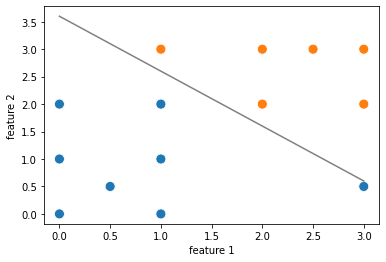

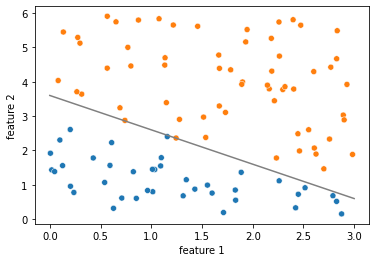

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100, legend=False )

coefficients = model.coef_
print(coefficients)
coeff1 = coefficients[0][0]
coeff2 = coefficients[0][1]
intercept = model.intercept_[0]
print(coeff1, coeff2, intercept)
x = np.arange(0, 3.1, 1)
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

plt.figure(figsize=(6,4))
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

# Now let's visualise our data on some predicted values

features_predict = np.array( [ [random.uniform(0,3), random.uniform(0,6)] for i in range(100) ] )
labels_predict = np.array( model.predict(features_predict) )

df_predict = pd.DataFrame({
	'feature 1': features_predict[:, 0], 
	'feature 2': features_predict[:, 1], 
	'predicted labels': labels_predict
})
df_predict.head()

sns.scatterplot( data=df_predict, x='feature 1', y='feature 2', hue='predicted labels', legend=False )

# The final equation is x1*a + x2*b + c = 0, where a and b = model.coef_[0] and model.coef_[1]; c = intercept = model.intercept_[0]
# Also, equation can be written as: x2 = (-x1*a - c)/b


## Logistic regression (continuous perceptron)


Logistic regression - continuous perceptron uses the sigmoid function to calculate the output. 

Prediction:

$$ \hat{y} = \sigma( \sum_{i=1}^{n} w_{i} x_{i} + b ) $$




Returns a float within the $[0,1]$ range. 
- Close to $0$ - more like "No", 
- close to $0.5$ - neutral, 
- close to $1$ - more like "Yes".

Uses sigmoid function. 



### 1 (by hand)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

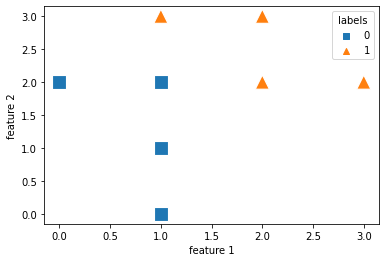

In [25]:


features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

# Visualise the dots
df = pd.DataFrame({
	'feature 1': features[:,0],
	'feature 2': features[:,1],
	'labels': labels
})
df

sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )


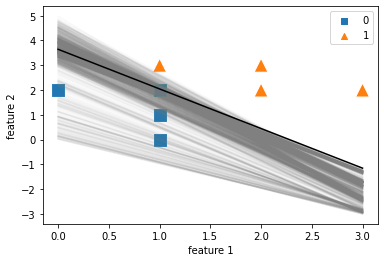

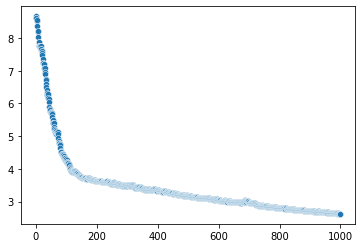

In [27]:
import utils, random

def sigmoid(x):
	""" the Sigmoid function """
	return np.exp(x) / (1 + np.exp(x))

def score(weights, bias, features):
	""" dot product is like product between vectors (x1,x2,...,xn) and (w1,w2,...,wn) = w1x1 + w2x2 + ... + wnxn """
	return np.dot(weights, features) + bias

def prediction(weights, bias, features):
	return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
	pred = prediction(weights, bias, features)
	return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
	total_error = 0
	for i in range(len(features)):
		total_error += log_loss(weights, bias, features[i], labels[i])
	return total_error

def logistic_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred)*features[i]*learning_rate
		bias += (label-pred)*learning_rate
	return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
	sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	for i in range(epochs):
		errors.append(total_log_loss(weights, bias, features, labels))
		j = random.randint(0, len(features)-1)
		weights, bias = logistic_trick(weights, bias, features[j], labels[j])
		# Plot
		x = np.arange(0, 4, 1)
		sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='grey', alpha=0.05 )
	sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='black' )
	plt.figure(figsize=(6,4))
	# print(errors)
	sns.scatterplot( x=[i for i in range(epochs)], y=errors )
	return weights, bias

weights, bias = logistic_regression_algorithm(features, labels, epochs=1000)



In [28]:
print(weights, bias)
print('-'*30)

def predict(weights, bias, X):
	x = np.dot( X, weights ) + bias
	y_hat = np.exp(x) / (1 + np.exp(x))
	print(y_hat)

predict(weights, bias, [[1,0], [1,3], [3,2]])

[1.0586282687437438, 0.6624514258859706] -2.4123297834458417
------------------------------
[0.20526588 0.65331725 0.88977627]


### 2 (IMBD)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [31]:
df = pd.read_csv('example_datasets/ML/IMDB_Dataset.csv')

def text_clean(text):
	text = text.lower()
	text = re.sub( '[,.?:\'"]', '', text )
	text = re.sub( '<br />', '', text )
	return text

df['proc'] = df['review'].apply( lambda x: text_clean(x) )

df.head()

,review,sentiment,proc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy (...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [33]:
Independent_var = df['proc']
Dependent_var = df['sentiment']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state=225)

print( f"IV_train: {len(IV_train)} | DV_train: {len(DV_train)}" )
print( f"IV_test: {len(IV_test)} | DV_test: {len(DV_test)}" )

IV_train: 45000 | DV_train: 45000
IV_test: 5000 | DV_test: 5000


In [36]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [37]:
model = Pipeline([('vectorizer', tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2241,  233],
       [ 265, 2261]], dtype=int64)

In [38]:

print(f"Accuracy: {accuracy_score(predictions, DV_test)}")
print(f"Precision: {precision_score(predictions, DV_test, average='weighted')}")
print(f"Recall: {recall_score(predictions, DV_test, average='weighted')}")


Accuracy: 0.9004
Precision: 0.9004788607422379
Recall: 0.9004


In [39]:
example = ['It was bad. I expected this movie to be much more exciting, but in the end it was disappointing.']
result = model.predict(example)
print(result)

['negative']


## naive Bayes

### 1 (by hand)

In [40]:
import numpy as np
import pandas as pd

In [41]:
emails = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_8_Naive_Bayes/emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [43]:
def process_email(text):
	text = text.lower()
	return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[information, is, nowadays, distinctive, draft..."
1,Subject: the stock trading gunslinger fanny i...,1,"[muzo, is, plain, chameleon, boar, yes, ramble..."
2,Subject: unbelievable new homes made easy im ...,1,"[is, hearing, way, homes, the, ask, advantage,..."
3,Subject: 4 color printing special request add...,1,"[information, version, is, 8090, &, 5110, :, a..."
4,"Subject: do not have money , get software cds ...",1,"[is, me, are, t, compatibility, old, the, ende..."


In [44]:
# Finding the priors
prior = sum(emails['spam']) / len(emails)
print(f"Priors: probability that an email is spam: {prior:.4f}")

# Finding the posterios with Bayes' theorem

## Create a dictionary called 'model', which records each word together with the number of appearances of the word in spam emails and in ham emails
model = {}
for index, email in emails.iterrows():
	for word in email['words']:
		if word not in model:
			model[word] = {'spam':1, 'ham':1} # Here we initialise the counts at 1, in order to prevent division by zero in the future
		if word in model:
			if email['spam']:
				model[word]['spam'] += 1
			else:
				model[word]['ham'] += 1

print(model['lottery'])
print(model['sale'])


Priors: probability that an email is spam: 0.2388
{'spam': 9, 'ham': 1}
{'spam': 39, 'ham': 42}


In [45]:
# Implementing the naive Bayes algorithm
def predict_naive_bayes(email):
	total = len(emails) # Calculates the total number of emails, spam emails, and ham emails
	num_spam = sum(emails['spam'])
	num_ham = total - num_spam
	email = email.lower() # Proccess each email by turning it into a list of its words in lowercase
	words = set(email.split())
	spams = [1]
	hams = [1]
	for word in words:
		if word in model:
			# For each word, computes the conditional probability that an email containing that word is spam (or ham) as a ratio
			spams.append(model[word]['spam']/num_spam*total)
			hams.append(model[word]['ham']/num_ham*total)
	# Multiplies all the previous probabilities times the prior probability of the email being spam, and calls this prod_spams. 
	# Does a similar process for prod_hams
	prod_spams = np.compat.long(np.prod(spams)*num_spam)
	prod_hams =  np.compat.long(np.prod(hams)*num_ham)
	# Normalises these two probabilities to get them to add to one (using Bayes' theorem) and return the result
	return prod_spams/(prod_spams+prod_hams)



In [46]:
print( predict_naive_bayes('Hi mom how are you?') );
print( predict_naive_bayes('meet me at the lobby of the hotel at nine am') )
print( predict_naive_bayes("buy cheap lottery easy money now") )
print( predict_naive_bayes('We have a business meeting at 9am in the meeting room') )


0.13743544730963977
6.964603508395965e-05
0.999973472265966
0.0006807487677137641


## Decision trees

Decision tree: a ML model based on binary tree (yes-no answer). 

The algorithm to build a decision tree:
1. Figure out which data is the most useful to decide which app to recommend; 
2. This features splits the data into two smaller datasets; 
3. Repeat processes 1 and 2 for each of the two smaller datasets; 

The procedure for splitting based on the best feature (question) can be performed by : accuracy, Gini impurity index, and entropy:
- Accuracy: split diffeerently by the two features, and check accuracy by recommending the most common in each group; 
- Gini index: the measure of diversity; In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the Gini impurity index is: $ Gini = 1 - p_{1}^{2} - p_{2}^{2} - ... - p_{n}^{2} $, where $p_{i} = \frac{a_{i}}{m}$. Can be interpreted as the probability that if we pick two random elements out of the set, they belong to different classes. E.g. Gini of the following set `[red, red, red, red, red, red, red, red, blue, blue]` is the following: $ Gini = 1 - (\frac{8}{10})^{2} - (\frac{2}{10})^{2} = 0.32 $; 
$$ Gini = 1 - p_{1}^{2} - p_{2}^{2} - ... - p_{n}^{2} $$

- Entropy: what is the probability that, by picking an item from the set, recording its value, and returning it to the pile, we get the exact sequence that defines the original set? E.g. set `[red, red, red, red, red, red, red, red, blue, blue]`, $ P(8r, 2b) = (\frac{8}{10})^{2} (\frac{2}{10})^{2} = 0.006711 $. In a set with $m$ elements and $n$ classes, with $a_{i}$ elements belonging to the $i$-th class, the entropy is: 
$$ Entropy = -p_{1} log_{2}(p_{1}) - p_{2} log_{2}(p_{2}) - ... - p_{n} log_{2}(p_{n}) $$
, where $ p_{i} = \frac{a_{i}}{m} $

The above approaches each, can be summed up by average (if groups are of equal sizes) or weighted means (if unequally-sized groups). 



In [72]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [73]:
data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_9_Decision_Trees/Admission_Predict.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [75]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

# Training a decision tree
dt = DecisionTreeClassifier()
dt.fit(features, labels)
print( dt.predict(features[0:5]) )
print( dt.score(features, labels) ) # Score is 100%, so this model probably overfits
# If we plot this tree, the depth will be 10


[ True  True False  True False]
1.0


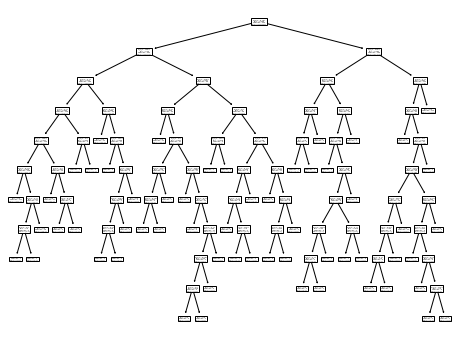

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6));
plot_tree(dt);

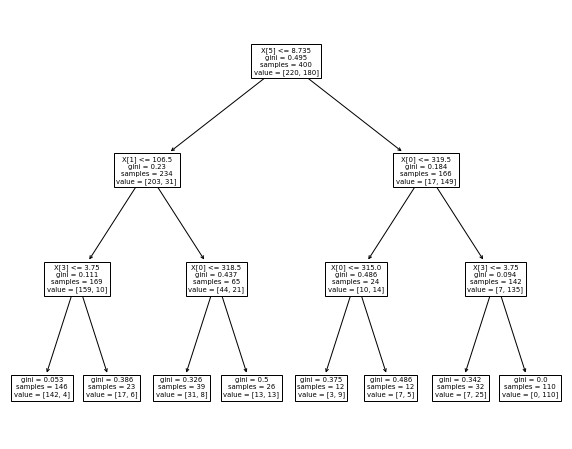

In [77]:
# Let's set some hyperparameters in Scikit-learn to prevent overfitting

"""
max_depth: the maximum allowed depth
max_features: the maximum number of features considered at each split; 
min_impurity_decrease: the decrease in impurity must be higher than this threshold to split a node
min_impurity_split: when the impurity at a node is lower than this threshold, the node becomes a leaf
min_samples_leaf: the minimum number of samples required for a leaf node; 
min_samples_split: the minimum number of samples required to split a node; 
"""

dt_smaller = DecisionTreeClassifier(
	max_depth=3, 
	min_samples_leaf=10, 
	min_samples_split=10
)
dt_smaller.fit(features, labels)

plt.figure(figsize=(10,8))
plot_tree(dt_smaller);

In [78]:
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]]) # The model (tree) predicts that this student will be admitted


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Ensemble

Ensemble methods:
- **Bagging**: constructing a few models in a random way and joining them together; 
- Examples: Random forests
- **Boosting**: building these models in a smarter way by picking each model strategically to focus on the previous models' mistakes.
- Examples: AdaBoost, Gradient boosting, XGBoost.  

Ensemble methods combine several weak learners (models) into a strong learner (model). 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)



In [2]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset.head()

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1


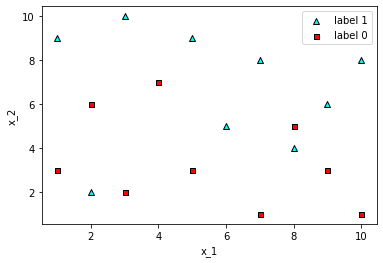

In [3]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [4]:
# An example of overfitting the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

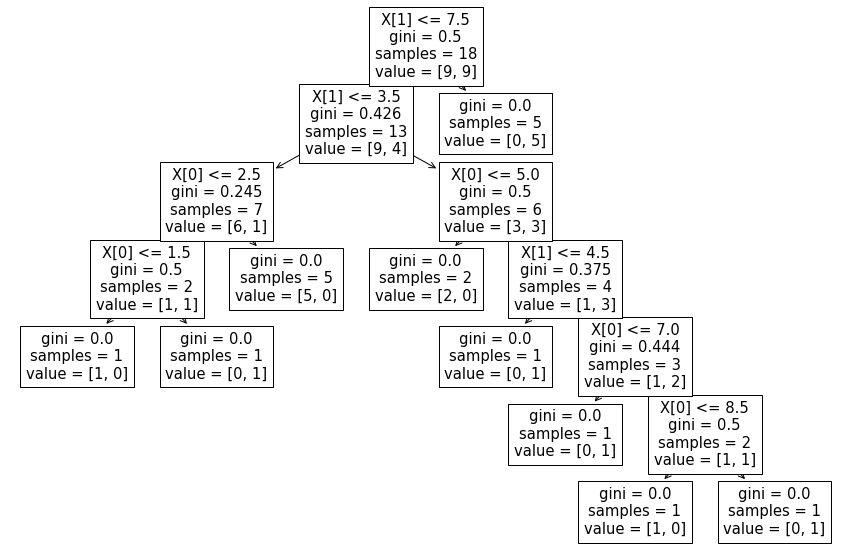

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10));
plot_tree(decision_tree_classifier);

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


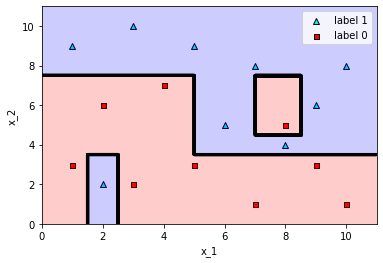

In [11]:
utils.plot_model(features, labels, decision_tree_classifier)

In [85]:
# Then, let's train a random forest to get a better fit

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(
	random_state=0, 
	n_estimators=5, # We want 5 weak learners 
	max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


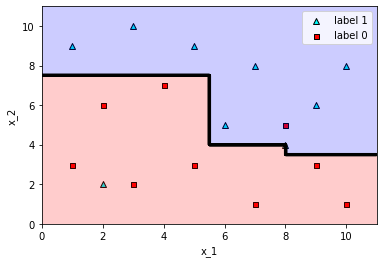

In [86]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


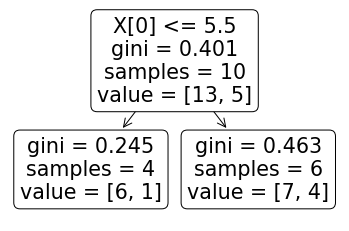

c:\Users\evgen\Desktop\Statistics_manual\utils.py:37: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


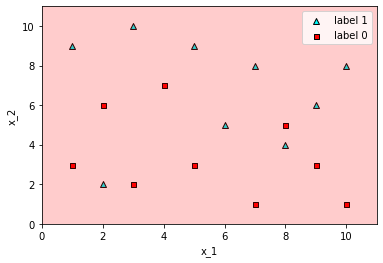

****************************** Estimator ******************************


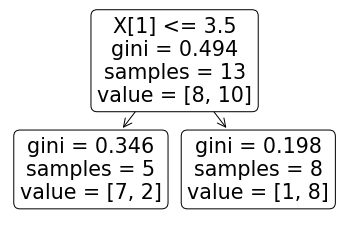

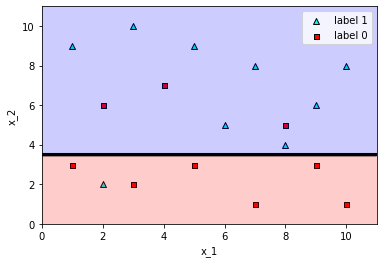

****************************** Estimator ******************************


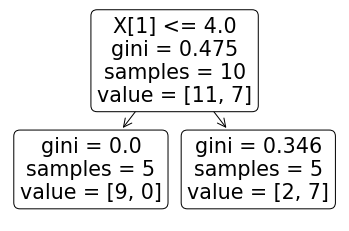

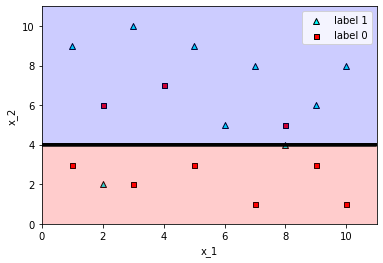

****************************** Estimator ******************************


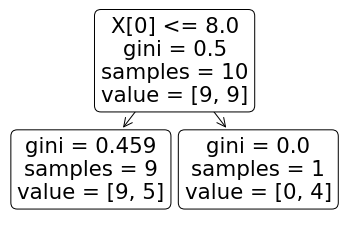

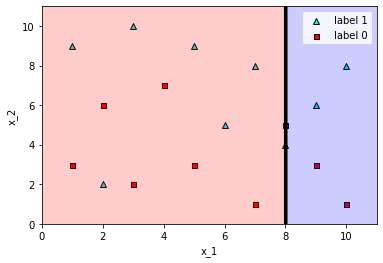

****************************** Estimator ******************************


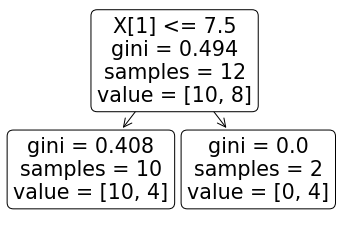

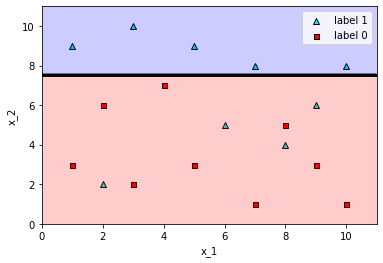

In [87]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

# Below, we can see that the weak learner number 1 is not useful, as it simply classifies all points as ham

## Titanic classification project

### Import modules

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score


### Data cleaning

In [2]:
# Loading the dataset
raw_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv', index_col='PassengerId')
raw_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# exploring the dataset
print("The dataset has", len(raw_data), "rows")
print("Columns (features of the dataset):")
print(list(raw_data.columns))
print(sum(raw_data['Survived']),'passengers survived out of',len(raw_data))

The dataset has 891 rows
Columns (features of the dataset):
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
342 passengers survived out of 891


In [4]:
# cleaning up the data

# Check out how many columns have missing values
print(f"Missing values per feature: \n{raw_data.isna().sum()}")
# It seems that the "cabin" feature has too many missing values
# so let's drop "cabin"
clean_data = raw_data.drop('Cabin', axis=1)
print('-'*50)

# For the "Age" column, let's fill in the missing values with the median of all ages
median_age = raw_data['Age'].median()
# print(f"Median age: {median_age}")
clean_data['Age'] = clean_data['Age'].fillna(median_age)
# for Embarked column, let's make a new category "U" - for unknown port of embarkment
clean_data['Embarked'] = clean_data['Embarked'].fillna('U')
print('Missing values post-processing:')
print(clean_data.isna().sum())
clean_data.head()

Missing values per feature: 
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
--------------------------------------------------
Missing values post-processing:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Data preprocessing

In [5]:
# Let create a copy for preprocessing
preprocessed_data = clean_data.copy(deep=True)

# Now we can manipulate the features by performing the following: one-hot encoding; binning; feature selection

In [6]:
"""
Let's start with the features selection. 
some features are unique for each passenger, such as passengerId, Name, and Ticket. So we'll get rid of them:
"""
preprocessed_data.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)
preprocessed_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [7]:
# One-hot encoding
# categorical data - best strategy is to hot-encode it, so let's do this with the features "Sex" and "Embarked"
gender_columns = pd.get_dummies(preprocessed_data['Sex'], prefix='Sex')
print(gender_columns)
embarked_columns = pd.get_dummies(preprocessed_data["Embarked"], prefix="Embarked")
# print(embarked_columns)
# Concatenate the hot-encoded columns with the original dataframe
preprocessed_data = pd.concat([preprocessed_data, gender_columns], axis=1)
preprocessed_data = pd.concat([preprocessed_data, embarked_columns], axis=1)
preprocessed_data = preprocessed_data.drop(['Sex', 'Embarked'], axis=1)
preprocessed_data.head()

             Sex_female  Sex_male
PassengerId                      
1                     0         1
2                     1         0
3                     1         0
4                     1         0
5                     0         1
...                 ...       ...
887                   0         1
888                   1         0
889                   1         0
890                   0         1
891                   0         1

[891 rows x 2 columns]


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [8]:
# We can also hot-encode some numerical features, such as Pclass
# The "Pclass", for example. we might imagine that with higher class, there is increased survivability chance, 
# so let's check it:

class_survived = preprocessed_data[['Pclass', 'Survived']]

first_class = class_survived[class_survived['Pclass'] == 1]
second_class = class_survived[class_survived['Pclass'] == 2]
third_class = class_survived[class_survived['Pclass'] == 3]

print(f"In the first class,  {sum(first_class['Survived'])/len(first_class)*100  :.0f}% of passengers survived. ")
print(f"In the second class, {sum(second_class['Survived'])/len(second_class)*100:.0f}% of passengers survived. ")
print(f"In the third class,  {sum(third_class['Survived'])/len(third_class)*100  :.0f}% of passengers survived. ")

# There does seem to be a trend there, so let's leave it as is

In the first class,  63% of passengers survived. 
In the second class, 47% of passengers survived. 
In the third class,  24% of passengers survived. 


In [9]:
# Now let's do some binning - turning numerical data into categorical data
# Let's bin the age into categories
# We'll do it because we substituted lots of missing age values with the median age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(preprocessed_data['Age'], bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data.drop(["Age"], axis=1, inplace=True)
print(preprocessed_data.head())
cagegorized_age_columns = pd.get_dummies(preprocessed_data['Categorized_age'], prefix='Categorized_age')
preprocessed_data = pd.concat([preprocessed_data, cagegorized_age_columns], axis=1)
preprocessed_data = preprocessed_data.drop(['Categorized_age'], axis=1)
preprocessed_data.head()

             Survived  Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  \
PassengerId                                                                  
1                   0       3      1      0   7.2500           0         1   
2                   1       1      1      0  71.2833           1         0   
3                   1       3      0      0   7.9250           1         0   
4                   1       1      1      0  53.1000           1         0   
5                   0       3      0      0   8.0500           0         1   

             Embarked_C  Embarked_Q  Embarked_S  Embarked_U Categorized_age  
PassengerId                                                                  
1                     0           0           1           0        (20, 30]  
2                     1           0           0           0        (30, 40]  
3                     0           0           1           0        (20, 30]  
4                     0           0           1           0    

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,3,0,0,7.9250,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,0,3,0,0,8.0500,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [10]:
# The dataset is cleaned and preprocessed, now we can save it as a file
# preprocessed_data.to_csv('preprocessed_titanic_data.csv', index=None)

### Train model

In [11]:
# Training model

In [12]:
data = preprocessed_data.copy(deep=True)

# Features-labels split and train-validation split
# Features - all the columns except "Survived"
features = data.drop(['Survived'], axis=1)
labels = data['Survived']

# Split the data into test-train-validation sets: 60-20-20%
## First split the data into two groups: one with train data, the other - with mixed test and validate
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
	features, labels, test_size=0.4, 
	random_state=100 # We fix random_state to make sure we get the same split every time
)
## Now, split the test-validate group into the separate test and validate groups
features_validation, features_test, labels_validation, labels_test = train_test_split(
	features_validation_test, labels_validation_test, test_size=0.5, random_state=100
)
print(f"For training, we will use {len(features_train)} features and {len(labels_train)} labels.")
print(f"For validation, we will use {len(features_validation)} features and {len(labels_validation)} labels.")
print(f"For testing, we will use {len(features_test)} features and {len(labels_test)} labels.")

For training, we will use 534 features and 534 labels.
For validation, we will use 178 features and 178 labels.
For testing, we will use 179 features and 179 labels.


In [13]:
"""
We'll train the following models:
- Logistic regression (perceptron)
- Decision tree
- Naive Bayes
- SVM
- random forest
- gradient boosted tree
- AdaBoost model
"""


"\nWe'll train the following models:\n- Logistic regression (perceptron)\n- Decision tree\n- Naive Bayes\n- SVM\n- random forest\n- gradient boosted tree\n- AdaBoost model\n"

In [15]:
lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

svm_model = SVC()
svm_model.fit(features_train, labels_train)

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier()

In [28]:
# Now let's evaluate the models

In [30]:
# Metric = accuracy

accuracy_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	accuracy_scores[j] = i.score(features_validation, labels_validation)

# Sort the dictionary based on value
accuracy_scores2 = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

print('Accuracies (high -> low): ')
for i in accuracy_scores2:
	print(f" - {i}: {accuracy_scores2[i]:.2f}")

# The highest accuracy (81%) is that of gradient boosting

Accuracies (high -> low): 
 - Gradient Boosting: 0.81
 - Decision Tree: 0.78
 - Random forest: 0.78
 - Logistic Regression: 0.77
 - AdaBoost: 0.76
 - Naive Bayes: 0.74
 - SVM: 0.68


In [33]:
# metric = F1 score

f1_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	predicted_labels = i.predict(features_validation)
	f1_scores[j] = f1_score(labels_validation, predicted_labels)

# Sort the dictionary based on value
f1_scores2 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

print('F1 score values (high -> low): ')
for i in f1_scores2:
	print(f" - {i}: {f1_scores2[i]:.2f}")

# The highest score is, once again, that of gradient boosting, F1-score = 0.74

F1 score values (high -> low): 
 - Gradient Boosting: 0.74
 - Random forest: 0.71
 - Decision Tree: 0.70
 - Logistic Regression: 0.69
 - AdaBoost: 0.68
 - Naive Bayes: 0.66
 - SVM: 0.40


### Finetuning

In [34]:
# Above we did the training with the default hyperparameters
# Now let's finetune them by a Grid search
# Let's choose Gradient Boosting for the grid search

In [42]:
grid_search_parameters = {
	'loss': ['log_loss', 'exponential' ],
	# 'learning_rate': [0.1, 0.5, 1],
	'max_depth': [1,2,3], 
	'n_estimators': [1, 20, 40, 60, 80, 100, 120, 140]
}

gb_grid = GradientBoostingClassifier()
gb_grid2 = GridSearchCV(estimator = gb_grid, param_grid = grid_search_parameters)
gb_grid2.fit(features_train, labels_train)

gb_winner = gb_grid2.best_estimator_
print(gb_winner)
print(gb_winner.score(features_validation, labels_validation))

# Couldn't improve much, so let's just roll with the first model

GradientBoostingClassifier(max_depth=2)
0.7921348314606742


### Test

In [117]:
# Now let's test some dataset

In [45]:
predictions = gb_model.predict( features_test )
print(f"Accuracy: {accuracy_score( labels_test, predictions ):.2f}")


Accuracy: 0.83


In [118]:
test_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/test.csv')
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [119]:
# Drop some columns
test_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/test.csv')
test_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)
# Process null values
print(test_data.isna().sum())

test_data['Age'] = test_data['Age'].fillna(28)
average_fare = test_data["Fare"].mean()
test_data['Fare'] = test_data['Fare'].fillna(average_fare)

# One-hot encoding
gender_columns   = pd.get_dummies(test_data['Sex'], prefix='Sex')
embarked_columns = pd.get_dummies(test_data["Embarked"], prefix="Embarked")
# Concatenate the dataset with the newly-created columns
test_data = pd.concat([test_data, gender_columns], axis=1)
test_data = pd.concat([test_data, embarked_columns], axis=1)
test_data = test_data.drop(['Sex', 'Embarked'], axis=1)
test_data['Embarked_U'] = 0

# Binning
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(test_data['Age'], bins)
test_data['Categorized_age'] = categorized_age
test_data = test_data.drop(["Age"], axis=1)
cagegorized_age_columns = pd.get_dummies(test_data['Categorized_age'], prefix='Categorized_age')
test_data = pd.concat([test_data, cagegorized_age_columns], axis=1)
test_data = test_data.drop(['Categorized_age'], axis=1)
test_data.head()

test_data.head()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,3,0,0,7.8292,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,3,1,0,7.0000,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2,0,0,9.6875,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,3,0,0,8.6625,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,3,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [120]:
# Logistic regression
print( sum(lr_model.predict(test_data)) )

# Decision tree
print( sum(dt_model.predict(test_data)) )

# Naive Bayes
print( sum( nb_model.predict(test_data) ) )

# SVM
print( sum(svm_model.predict(test_data)))

# Random forest
print( sum(rf_model.predict(test_data)))

# Gradient boosting
print( sum(gb_model.predict(test_data)))

# AdaBoost
print( sum(ab_model.predict(test_data)))

144
144
178
61
144
150
150


## Sort out

### Scikit-learn

`scikit-learn==0.23.0`

Data -> split into X (variable 1) and Y (variable 2) -> pre-process variables (e.g. scale) -> give to model -> prediction



In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#### SVM 

(support vector machine)

<img src="Media/SVM.png" width=400>

SVM classifier uses two parallel lines instead of one line. SVM - line in the middle that tries to stay as far as possible from the points. 

Error function:

we try to maximie two things: the classification of the points and the distance between the lines. 

$$Error = C*classificationError + distanceError$$
, where $C$ - the C parameter. 

Classification error - sum of absolute values of the two equations. With increasing w1 and w2, the error becomes smaller. 

$$ distanceError = \frac{2}{\sqrt{w_{1}^{2} + w_{2}^{2}}} $$

C parameter:
- C is large, the error formula dominated by classification error, focusing more on this error; 
- C is small, focus on distance error. 

SVM is useful for linear classifiers and (with the use of kernel method) nonlinear classifiers. 

In [ ]:
# Effective when working with many features
# many kernel functions

# kernels (line) can be linear (straight line), polynomial (curves), exponential, RBF


In [ ]:
from sklearn import datasets
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# Let's use the iris dataset
# and classify on whether the plant is vericosa, or other

iris = datasets.load_iris()
print(iris.DESCR)

In [ ]:

# split the data into features and labels
X, y = iris.data, iris.target
print(X.shape, y.shape)

classes = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']

from sklearn import svm
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# create a model object
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

from sklearn.metrics import accuracy_score
# metrics
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Predictions: ", predictions)
print("Actual:      ", y_test)
print(f"Accuracy: {acc:.3f}")

for i in range(len(predictions)):
	print(classes[predictions[i]])

##### Proj 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import utils

In [ ]:
linear_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/linear.csv', index_col=0)
linear_data.head()

In [ ]:
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
sns.scatterplot( data=linear_data, x='x_1', y='x_2', hue='y' )

In [ ]:
# Default C
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print(f"Default C | Accuracy: {svm_linear.score(features,labels):.3f}")

# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01 | Accuracy:", svm_c_001.score(features, labels))


# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100 | Accuracy:", svm_c_100.score(features, labels))


In [ ]:
# Now, training SVM with nonlinear boundaries - the kernel method

# A powerful method associated with SVM called the kernel method


In [ ]:
circular_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/one_circle.csv', index_col=0)
features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])
circular_data.head()

In [ ]:
sns.scatterplot( data=circular_data, x='x_1', y='x_2', hue='y', s=80 )
# Circular dataset

In [ ]:
# Degree = 2
# We use degree of 2, because the equation of a circle is a polynomial of degree 2
# or, rather we use an oval shape
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(features, labels)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(features, labels))
# utils.plot_model(features, labels, svm_degree_2)
print('-'*100)

# Degree = 4
# Like an oval with rounded edges
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(features, labels)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(features, labels))
# utils.plot_model(features, labels, svm_degree_4)

In [ ]:
# What if there are two circles in the dataset?

In [ ]:
two_circles_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_11_Support_Vector_Machines/two_circles.csv', index_col=0)
features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])
two_circles_data.head()

In [ ]:
# gamma = 0.1
# Underfits a litte, because it thinks the boundary is one oval
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(features, labels)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
utils.plot_model(features, labels, svm_gamma_01)

# gamma = 1
# Good model that captures the data well
# Best gamma
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(features, labels)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
utils.plot_model(features, labels, svm_gamma_1)

# gamma = 10
# Overfit, as it encircles the outliers
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(features, labels)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
utils.plot_model(features, labels, svm_gamma_10)

# gamma = 100
# Serious overfitting, where it surrounds each triangle with a small circular region
svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(features, labels)
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
utils.plot_model(features, labels, svm_gamma_100)



#### KMeans

KMeans clustering algorithm uses centroids. Starts by generating 2 centroids (based on number of labels) randomly, then adjusts their position. 

<img src="Media/KMeans.png" width=400>

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [65]:
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [66]:
# x = bc.data
# print(x)

In [67]:
# In x , big difference between the numbers, so let's scale them
x = scale(bc.data)
print(x)

y = bc.target
print(y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = KMeans(n_clusters=2, random_state=0)

model.fit(x_train) # we don't put in y

KMeans(n_clusters=2, random_state=0)

In [69]:
predictions = model.predict(x_test)
labels = model.labels_

print("labels", labels)
print("predictions", predictions)
print("accuracy: ", accuracy_score(y_test, predictions))
print("actual values", y_test)

labels [1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 1 0 1 1 0]
predictions [1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 

In [70]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0       33  144
1      268   10


## Tensorflow

Tensor - a vector of some dimensionality. 

Rank / degree - the number of dimensions involved in the tensor. 

Types of tensors:
- variable: mutable
- constant: immutable
- placeholder: immutable
- SparseTensor: immutable



In [1]:
import tensorflow as tf

In [2]:
# Some tensors of rank 0 (scalar)
string = tf.Variable('this is a string', tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

# tensors of higher rank
rank1_tensor = tf.Variable(['test', 'ok', 'tim'], tf.string)
rank2_tensor = tf.Variable([['test', 'ok', 'two'], ['test', 'yes', 'no']], tf.string)

# Print the rank of a tensor
print(tf.rank(rank2_tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [3]:
# Shape of a tensor - how many values there are in each dimension
rank2_tensor.shape

TensorShape([2, 3])

In [6]:
# Changing shape of a tensor
tensor1 = tf.ones([1,2,3]) # Create a tensor full of ones of shape [1,2,3]
print(tensor1)

tensor2 = tf.reshape(tensor1, [2,3,1])
print(tensor2)

tensor3 = tf.reshape(tensor2, [3, -1])
print(tensor3)

tensor4 = tf.reshape(tensor1, [6])
print(tensor4)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1.], shape=(6,), dtype=float32)


AttributeError: module 'tensorflow' has no attribute 'Session'


### classification

In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
	'iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
)

test_path = tf.keras.utils.get_file(
	'iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'
)

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
print(train.head())

train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

def input_fn(features, labels, training=True, batch_size=256):
	dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
	# Shuffle and repeat if you are in training mode
	if training:
		dataset = dataset.shuffle(1000).repeat()
	return dataset.batch(batch_size)

my_feature_columns = []
for key in train.keys():
	my_feature_columns.append(tf.feature_column.numeric_column(key=key))

# deep neural network (DNN)
# Linear classifier 

classifier = tf.estimator.DNNClassifier(
	feature_columns=my_feature_columns,
	# Two hidden layers of 30 and 10 nodes respectively
	hidden_units = [30, 10],
	# The model must choose between 3 classes
	n_classes=3
)

classifier.train(
	input_fn= lambda: input_fn(train, train_y, training=True), 
	steps=5000
)

eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, test_y, training=False))


   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\evgen\\AppData\\Local\\Temp\\tmp6xidqhv1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_dela

In [43]:
print(f'Test set accuracy: {eval_result}')

Test set accuracy: {'accuracy': 0.93333334, 'average_loss': 0.3733698, 'loss': 0.3733698, 'global_step': 5000}


In [47]:
def input_fn(features, batch_size=256):
	return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predict = {
	'SepalLength': [6.4],
	'SepalWidth': [2.8],
	'PetalLength': [5.6], 
	'PetalWidth': [2.2],
}

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
	print(pred_dict)
	class_id = pred_dict['class_ids'][0]
	probability = pred_dict['probabilities'][class_id]
	print(f"Prediction is {SPECIES[class_id], 100*probability}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\evgen\AppData\Local\Temp\tmp6xidqhv1\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-2.007372 ,  1.3968128,  2.7342505], dtype=float32), 'probabilities': array([0.00686296, 0.20650472, 0.78663236], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is ('Virginica', 78.66323590278625)


# Deep Learning


Neural networks; also called multilayer perceptrons. Field that uses NN - Deep Learning. 

Has input layer, hidden layers, and output layer. Hidden layer adds a layer of complexity in order to be able to recognise patterns. 

Below: $w$, weight; $b$, constant; $f(x)$, activation function; $y_{1}$, output. 

$$ \sum_{i=1}^{n} ( x_{i} w_{i} + b_{i} ) => f(x) => y_{1} $$

<img src="Media/NN.png" width=400>

Examples of NN applications: 
- Detect fraud in banks; 
- Microscope - recognise cancer cells; 
- Recognise voice; 
- Classification; 
- Image recognition; datasets - MNIST, CIFAR-10, CIFAR-100; 
- Chat bots. 

Training neural networks:
Neural networks consist of architecture (neurons and their connections) and their weights. 

Optimisation - adjusting weights. 

Backpropagation of the error - algorithm to teach NN: error from output layer propagates back, adjusting weights. 

Overfitting. 



In a sense, NN is like a collection of perceptrons (linear classifier) that gives rise to nonlinear classification. 

Neural Network is a combination of perceptrons (neurons). 

Training a Neural Network:
1. Begin by initialising all the weights and biases at random; 
2. Define an error function to measure the performance of the neural network; 
3. We repeatedly use the error function to tune in the weights and biases of the model to reduce the error function; 

Error function, e.g. log loss function:
$$ logLoss = -y ln(\hat{y}) - (1-y)ln(1-\hat{y})) $$


Activation functions:

**Hyperbolic tangent (tanh)**

$$ tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

**Rectified linear unit (ReLU)**

For x >= 0, ReLU(x) = x, and for x < 0, ReLU(x) = 0. 

## Optimizer

Optimisation function - implements the backpropagation algorithm. 
- Gradient Descent; 
- Stochastic Gradient Descent; 
- Mini-batch gradient descent; 
- momentum; 
- Nesterov accelerated gradient; 



### Proj 0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

<AxesSubplot:xlabel='x_1', ylabel='x_2'>

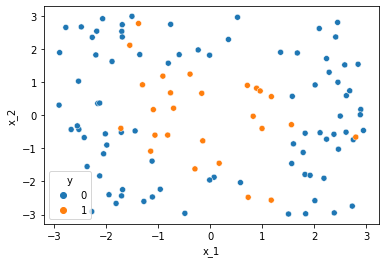

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_10_Neural_Networks/one_circle.csv', index_col=0)
x = np.array(df[['x_1', 'x_2' ]])
y = np.array(df['y']).astype(int)
df

sns.scatterplot( data=df, x='x_1', y='x_2', hue='y' )

In [8]:
# Preprocessing the data

## categorizing the output

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
# Building and compiling the neural network

# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
# first hidden layer with ReLU activation function
model.add(Dense(128, activation='relu', input_shape=(2,)))
# Dropout with probability of 0.2
model.add(Dropout(.2))
# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
# Output layer with a softmax activation function
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', # Loss function 
	optimizer='adam', # Built-in tricks: Adam, SGD, RMSProp, AdaGrad
	metrics=['accuracy']) # Metric to report at each epoch
model.summary()

In [ ]:
# Training the neural network

model.fit(
	x, # Features
	categorized_y, # Labels
	epochs=100, # The number of times we run backpropagation on our whole dataset
	batch_size=10) 

In [ ]:
import random

features_predict = np.array( [ [random.uniform(-3,3), random.uniform(-3,3)] for i in range(100) ] )
labels_predict = np.array( model.predict(features_predict) )
# features_predict
labels_predict2 = [np.argmax(pred) for pred in labels_predict]
labels_predict2

In [ ]:
df_predictions = pd.DataFrame({
	'x_1': features_predict[:,0],
	'x_2': features_predict[:,1],
	'y': labels_predict2
})
df_predictions

In [ ]:
sns.scatterplot(data=df_predictions, x='x_1', y='x_2', hue='y')

### Proj 0.1

Training NN for image recognition. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Size of the training set", len(x_train))
print("Size of the testing set", len(x_test))

In [ ]:
plt.imshow(x_train[5], cmap='Greys')
print("The label is", y_train[5])

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='Greys')
    ax.set_title('Label:' + str(y_train[i]))


In [ ]:
# Reshaping the features.
# In the reshape function we use the -1 as a placeholder for the size of the dataset.

x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=10)

In [ ]:
# Evaluating the model to check that it is not overfitting

predictions_vector = model.predict(x_test_reshaped)

In [ ]:
predictions = [np.argmax(pred) for pred in predictions_vector]

In [ ]:
# Correct one
plt.imshow(x_test[4], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[4])
print("The prediction is", predictions[4])

In [ ]:
# Mistake of the model
plt.imshow(x_test[18], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[18])
print("The prediction is", predictions[18])

### Proj1

In [ ]:
# Step 1 : labelled dataset
# EMNIST letter chunks 

from emnist import extract_training_samples


# Grab the data from OpenML website
# X - images, y - labels
X, y = extract_training_samples('letters')
# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


In [ ]:
import matplotlib.pyplot as plt

img_index = 1 # Change this as different examples
img = X_train[img_index]
print("Image label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [ ]:
# MLP (multi-layer perceptron network)
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Our NN will have:
# - 28 px * 28 px = 784 neurons (input layer)
# - 26 neurons (english alphabet characters) = output layer

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlpl = MLPClassifier(
	hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, 
	solver='sgd', verbose=10, tol=1e-4, random_state=1, 
	learning_rate_init=.1)

print('Created our first MLP network')


In [ ]:
# Train and test

mlpl.fit(X_train, y_train)
print(f"Training set score: {mlpl.score(X_train, y_train)}")
print(f"Test set score: {mlpl.score(X_test, y_test)}")


In [ ]:
# Create confusion matrix

# Initialise a list with all the predicted values from the training set
y_pred = mlpl.predict(X_test)

# Visualise the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

### Handwriting digit recognition

In [ ]:
# The goal of neural networks is to find patterns

from PIL import Image
import numpy as np, pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import mnist

In [ ]:
# Create training variables
x_train = mnist.train_images()
y_train = mnist.train_labels()


In [ ]:
x_test = mnist.test_images()
y_test = mnist.test_labels()


In [ ]:
print('x_train', x_train)
print('x_test', x_test)
print('y_train', y_train)


In [ ]:
print(x_train.ndim) # print number of dimensions
print(x_train.shape) # format of our list
# there are 60k samples / instances of 28x28 pixel images


In [ ]:
x_train = x_train.reshape((-1, 28*28))
print(x_train.shape)

In [ ]:
x_test = x_test.reshape((-1, 28*28))
print(x_test.shape)

In [ ]:
print(x_train[0])

In [ ]:
# NN work better with values from -1 to 1, so let's scale
x_train = (x_train/256)
x_test = (x_test/256)
print(x_train[0])

In [ ]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64,64)) # two hidden layers 64x64
clf.fit(x_train, y_train)

In [ ]:
prediction = clf.predict(x_test)
acc = confusion_matrix(y_test, prediction)
print(f"Accuracy: {acc}")

In [ ]:
def accuracy(cm):
	diagonal = cm.trace()
	elements = cm.sum()
	return diagonal / elements

print(accuracy(acc))

#### test

In [ ]:
# Now let's test it!
from PIL import Image

img = Image.open('example_datasets/Five1.png')
print(img)
data = list(img.getdata())


for i in range(len(data)):
	data[i] = 255 - data[i]


In [ ]:
five = data

five = np.array(five)/256
print(five)
# Let's do prediction...

In [ ]:
p = clf.predict([five])
print(p)

## DNN

DNN - it is connected to every node from the previous layer. 

## MNIST

In [10]:
import tensorflow as tf
from tensorflow import keras
# import keras
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns


In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"Train dataset: {train_images.shape}")
print(f"Test dataset: {test_images.shape}")
# So, 60,000 images made up of 28x28 pixels (784 in total)

Train dataset: (60000, 28, 28)
Test dataset: (10000, 28, 28)


In [14]:
# Let's take a look at one pixel
train_images[0,23,23]
# Pixel values are in the range 0-255 (black-white), in the grayscale; 

194

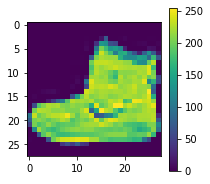

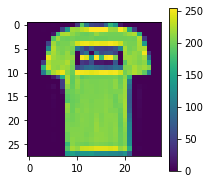

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
				'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(0,2):
	plt.figure(figsize=(3,3))
	plt.imshow(train_images[i])
	plt.colorbar()
	plt.grid(False)
	plt.show()

In [22]:
# Data preprocessing

# transform greyscale pixel values (0-255) to the range of 0-1. 

train_images = train_images / 255.0
test_images = test_images / 255.0


In [23]:
# Build the model
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)), # input layer (1) - flatten into an 728-long array
	keras.layers.Dense(128, activation='relu'), # hidden layer (2)
	keras.layers.Dense(10, activation='softmax') # output layer(3)
])

# sequential NN - input goes from left to right, sequentially

model.compile(
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']
)


In [24]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 0.4950 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3362 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3114 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2936 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2664 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2558 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2471 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_acc:.3f}")
# can change the number of epochs to see how the test accuracy score changes
# e.g. check epochs = [1, 5, 10]

313/313 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8860
Test accuracy: 0.886


In [28]:
# Make predictions
print(test_images.shape)
predictions = model.predict(test_images)

# predict just one
# predictions = model.predict([test_images[0]])

print(predictions) # probabilities for each of the outcomes

(10000, 28, 28)
313/313 [==============================] - 5s 4ms/step
[[1.6642846e-06 1.6877376e-09 9.2668795e-10 ... 7.5378490e-04
  6.1002993e-08 9.9796873e-01]
 [3.8647522e-05 4.4284157e-15 9.9983311e-01 ... 1.2522179e-21
  3.6415558e-11 1.1644887e-18]
 [1.4700845e-09 1.0000000e+00 4.2615287e-13 ... 2.0352436e-18
  1.5323963e-14 6.0244623e-18]
 ...
 [2.6763180e-06 6.0508057e-11 7.5937555e-07 ... 9.8304147e-09
  9.9997461e-01 8.2601556e-12]
 [2.7195423e-08 9.9996030e-01 1.7408813e-09 ... 1.2131204e-11
  3.5002782e-11 6.2037053e-10]
 [1.3692455e-05 7.7145607e-08 1.7227226e-06 ... 1.6536206e-03
  2.6462195e-04 1.6251572e-05]]


Actual label:    Bag
Predicted label: Bag
Predictions: [9.5072199e-09 1.5731366e-15 1.5966102e-10 4.6866190e-16 2.4617919e-09
 1.3185823e-07 7.9603768e-11 7.8716119e-15 9.9999988e-01 2.8264598e-21]


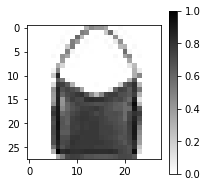

In [37]:
# e.g. let's check prediction for one of the images
index = 34

print(f"Actual label:    {class_names[ test_labels[index] ]}")
index_label = np.argmax(predictions[index])
print(f"Predicted label: {class_names[index_label]}")
print(f"Predictions: {predictions[index]}")

plt.figure(figsize=(3,3))
plt.imshow(test_images[index], cmap=plt.cm.binary) # 'cmap' parameter makes the figure grayscale
plt.colorbar()
plt.grid(False)
plt.show()



# Regression

Some definitions below:
| Term | Definition |
| - | - | 
| Weight | Factor by which we multiply each feature. If the weight is $0$, then this feature is irrelevant to predicting the label. |
| Bias | The constant in the formula that's not attached to any feature. |
| Univariate linear regression | We predict one label from one feature, e.g. $y = mx+b$ |
| Multivariate linear regression | Multiple features. |

Monotonic relationship: a relationship where two variables have the same sign of change, e.g. move in the same direction. This can be linear (two variables change at the same rate) or non-linear (change at different rates).

<img src="Media/Residuals.png" width="600"/>

**Simple linear regression**: relationship btw two variables. 

**Correlation** - enumerates direction and strength of a relationship. Enumerated by correlation coefficient. 

*Pearson's correlation coefficient (r)*: determines the strength of the linear relationship between the two normally-distributed variables. On scatterplot.
- multiply deviations from the mean of the two variables, divided by the product of SD for the two variables: 

$$ r = \frac{COVARIANCE(X, Y)}{S_{x}S_{Y}} = \frac{1}{n-1} * \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ S_{x} S_{y} } = \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ \sqrt{ \sum(x-\overline{x})^{2} \sum(y-\overline{y})^{2} } } $$

- $-1 < r < 1$
- $r = 1$ - perfect correlation
- $r = 0$ - independent 

*For non-normally distributed data - Kendall, Spearman correlation coefficients.*

Coefficient of determination ($r^{2}$): measure of how close the data points are to the estimated regression line. $r^{2} = 0.902$ means that the regression equation provides a very good fit with 90.2% of the variation in RHR explained by the regression equation. 

**Regression** - writing up a formula to predict future outcomes. 

Equation of regression (best-fit) line: 

$$ y = b + mx $$ 

, where $y$ = response / dependent variable, $b$ = the intercept (a constant) / bias (base value), $m$ = slope / weight, $x$ = predictor (independent) variable

Calculating this formula as per the **Least Squares** regression method; r - correlation (e.g. Pearson r) btw X and Y, Sy, Sx - SD:

$ m = slope = r (\frac{S_{y}}{S_{x}}) = \frac{ \sum((x_{i}-\overline{x})(y_{i}-\overline{y})) }{ \sum(x_{i}-\overline{x})^{2} } $

$ intercept = b = \overline{y} - m\overline{x} $

_**General Linear Regression equation**_ (for 1+ features):
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b $$

---

Additionally, i've read that the line of best fit can be derived by repeatedly readjusting weights and biases. 


## Error function

(also known as loss function, cost function)

A metric that tells us how our model is doing. 

Below is the table with the most important metrics:

| Metric name | Description | Equation |
| - | - | - |
| **Absolute error** | Sum of the absolute values of the distances between data point and the line. | $$ \sum( \mid y - \hat{y} \mid ) $$ |
| **Mean absolute error** | Mean of the vertical distances from the points to the line. | |
| **Square error** | Sum of squares of distances. |
| **Mean square error** | Mean of the squares of the distances. |
| **RMSE / RMSD** | Root of the mean square error; error around the regression line. Estimates the SD of y-values vertically. $\overline{y}_{i}$ - predicted value; $y_{i}$ - actual value. The advantage of RMSE is that it has the same units as the prediction. $y = mx + b \pm RMSE$ | $$ RMSE = \sqrt{ \frac{ \sum(\overline{y}_{i} - y_{i})^{2} }{ N } } $$ |



## Simple linear

$b$ = y-intercept, $m = \frac{dy}{dx}$ = slope.  


In [ ]:
# Calculating linear regression by hand
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

N = len(x_variable)
print(f"Sample size: {N}")

x_mean, y_mean = np.mean(x_variable), np.mean(y_variable)
print(f"Mean values: {x_mean} | {y_mean}")



sum_squaredDiff_x = sum([ (x - x_mean)**2 for x in x_variable ])
sum_squaredDiff_y = sum([ (y - y_mean)**2 for y in y_variable ])
print(f"Sums of squared diff from the mean: {sum_squaredDiff_x} | {sum_squaredDiff_y}")

x_SD = np.sqrt( sum_squaredDiff_x / (N-1) )
y_SD = np.sqrt( sum_squaredDiff_y / (N-1) )
print(f"Standard deviations: {x_SD:.3f} | {y_SD:.3f}")

sum_product_diffFromMean_x_y = sum([ (x-x_mean)*(y-y_mean) for x, y in zip(x_variable, y_variable) ])
print(f"Sum of products of differences from the mean of x and y: {sum_product_diffFromMean_x_y}")

# Calculate correlation coefficient r
r = sum_product_diffFromMean_x_y / np.sqrt( sum_squaredDiff_x * sum_squaredDiff_y )
print(f"Correlation coefficient r: {r:.3f}")
print('-'*50)

# Calculate slope
m = r * (y_SD / x_SD)
print(f"Slope m = {m:.3f}")
# Calculate intercept
a = y_mean - m*x_mean
print(f"Intercept a = {a:.3f}")
# Derive the regression equation
print(f"Regression equation: y = {a:.3f} + {m:.3f}x")

sns.scatterplot(x=x_variable, y=y_variable)
x1 = np.arange(12, 20, 1)
sns.lineplot( x=x1, y= a + m*x1, label=f'y = {a:.2f} + {m:.2f}x' )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_variable,y_variable)
print(slope, intercept)

fig = plt.figure(figsize=(4, 4))
x = np.arange(10, 21, 1 )
plt.plot( x, x*slope + intercept, label=f'y =  {intercept:.2f} + {slope:.2f}x' )
plt.scatter( x_variable, y_variable, alpha=0.4 )
plt.legend()


y_predicted = [ x*slope + intercept for x in x_variable ]
sum_squared_diff = sum([ (y_hat - y)**2 for y, y_hat in zip(y_variable, y_predicted) ])
rmse = ( sum_squared_diff/len(y_variable) )**0.5
print(f"RMSE: {rmse:.2f}")
print(f"Actual equation with RMSE: y = ({intercept:.2f} + {slope:.2f}x) +/- {rmse:.2f} ")

plt.plot( x, x*slope + intercept + rmse, color='lightgrey', label='RMSE' )
plt.plot( x, x*slope + intercept - rmse, color='lightgrey' )
plt.legend()

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np

# Generate semi-random dataset
dataset = pd.DataFrame({
	'Variable_x': np.linspace(0, 100, 20), 
	'Variable_y': [i + random.uniform(-5, 5) for i in range(20, 0, -1)]
})
dataset['Variable_y']

# Data Scatterplot
plt.figure(figsize=(7,5))
plt.scatter(dataset['Variable_x'], dataset['Variable_y'], alpha=0.3 )
plt.xlabel('Variable x'); plt.ylabel('Variable y')

# Linear Regression
model = LinearRegression()
# model.fit(lung[['Exposure']], lung['PEFR'])
model.fit(dataset[['Variable_x']], dataset['Variable_y'])
linreg_intercept = model.intercept_
linreg_coef = model.coef_[0]
print(f"Intercept: {linreg_intercept:.3f}")
print(f"Coefficient exposure: {linreg_coef:.3f}")

x_regline = np.arange(0, 100, 1)
plt.plot(x_regline, linreg_coef*x + linreg_intercept, color='black')
plt.text(50, model.predict([[50]])[0] +1, rf'$y = {linreg_coef:.1f}x + {linreg_intercept:.1f}$')

# Prediction of a specified value
x_value = 20
predicted_y = model.predict([[x_value]])[0]; print(predicted_y)
plt.text(x_value, predicted_y, 'x', size=15, color='red', ha='center', va='center')
plt.axhline(predicted_y, color='grey', linestyle='dashed')
plt.axvline(x_value, color='grey', linestyle='dashed')

In [ ]:
# MATPLOTLIB
# Linear regression

import pandas as pd, matplotlib.pyplot, numpy as np, pandas as pd, seaborn as sns
from scipy.stats import linregress

flowers_df = sns.load_dataset('iris')
df2 = flowers_df[flowers_df['species'] == 'setosa']
plt.scatter(df2['sepal_length'], df2['sepal_width'])

# Create line of best fit
correlation1 = linregress(df2['sepal_length'], df2['sepal_width'])
# slope, intercept, r, p, se = linregress(df2['sepal_length'], df2['sepal_width']) ## alternative way of writing it
x = np.arange(4.25, 6, 0.4)
y = correlation1.intercept + correlation1.slope * x
plt.plot(x, y, 'red', label='first LOBF')

# Create correlation to predict future correlation, taking into account some datapoints
df3 = df2[df2['sepal_length'] >= 5.25]
correlation2 = linregress(df3['sepal_length'], df3['sepal_width'])
x2 = np.arange(5.25, 7, 0.4)
y2 = correlation2.intercept + correlation2.slope * x2
plt.plot(x2, y2, 'green', label='seconds LOBF')

In [ ]:
# Obtaining an equation by teaching a model
# (described in the "Grokking Machine Learning" book)
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
	"""
	"Grokking Machine Learning", p. 55
	"""
	predicted_price = base_price + price_per_room * num_rooms
	base_price += learning_rate * (price - predicted_price)
	price_per_room += learning_rate * num_rooms * (price - predicted_price)
	return price_per_room, base_price

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	price_per_room = random.random() 
	base_price = random.random()
	# Repeats the update step many times
	slope_intercept_list = []
	for epoch in range(epochs):
		# Pick a random point in out dataset
		i = random.randint(0, len(features)-1) 
		num_rooms = features[i]
		price = labels[i]
		# Apply the square trick to move the line closer to our point
		price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
		slope_intercept_list.append([price_per_room, base_price])
	return slope_intercept_list

import numpy as np
features = np.array([1,2,3,5,6,7])
labels = np.array([155,197,244,356,407,448])

# Plot the visualisations
figure_size, epoch_alpha = (6,4), 0.2
for i in [10, 100, 1000]: # Different number of epochs
	plt.figure(figsize=figure_size)
	plt.scatter( features, labels )
	plt.xlabel('Feature: the number of rooms'); plt.ylabel('Label: price'); plt.title(f"N = {i} epochs")
	slope_intercept_list_ready = linear_regression(features, labels, learning_rate=0.01, epochs=i)
	for i in slope_intercept_list_ready:
		plt.plot( features, features*i[0] + i[1], color='grey', alpha=epoch_alpha )


## Polynomial

Polynomial is a function in one variable that can be expressed as the sum of multiples of powers of this variable. 

Examples: 
- Degree 0: $y = 4$
- Degree 1: $y = 3x+2$
- Degree 3: $y = x^{3} - 2x + 5$

Polynomial curve can be fitted to nonlinear data. Before fitting, decide on a shape: degree 1 - line; degree 2 - a parabola; degree 3 - a cubic. 




## Logistic

Sigmoid (logit) function. 

$$ logit(y) = \frac{ 1 }{ 1 + e^{-y} } $$

<img src="Media/Logistic_regression.png" width=200>

## Exponential

[6.93147181e-01 3.34966894e-15]


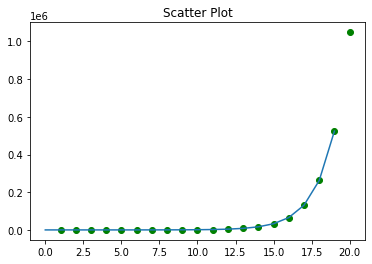

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# create the dataset

x = np.arange(1, 21, 1)
y = [2**i for i in x]
# x = np.arange(1, 21, 1)
# y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
#               33, 38, 44, 50, 56, 64, 73, 84, 97, 113])


#plotting the data
plt.scatter(x, y, color="green")
plt.title("Scatter Plot")
# plt.show()

#fit the model
# the model for our data is:
# y = A*exp{λt};
# Taking the log on both sides of y, we get
# log(y) = log(A) + λt

# So to fit our model, we first take the natural log on only the y variable and not t.

model = np.polyfit(x, np.log(y), 1) # the argument 1 idicates the degree of the polynomial
# view the model's output
print(model)

"""
log(y) = -0.11504963 - 0.0002615t

Let's simplify a bit:
b = -0.11504963; a = -0.0002615
log(y) = a + bt
e^log(y) = e^( a + bt )
y = exp(a) * exp(bt)
y = exp(a) * (exp(b))^t


"""
x_points = np.arange(0, 20, 1)
plt.plot(x_points, (np.e**model[1])*((np.e**model[0])**x_points) )

# Data Visualisations


In [ ]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

## Main parameters

<img src="Media/named_colors_seaborn.webp" width="500"/>

```python

# Set axis limits
ax = plt.gca()
ax.set_xlim([xMin, xMax])

# Save the figure in high definition
plt.savefig(
	f'Figure name.png', format='png', 
	dpi=800, 
	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
)

# Change order of items in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# Print text on the graph
plt.text(
	x, y, # Coordinates
	s, # text
	horizontalalignment=['left', 'right'], verticalalignment=['bottom', 'top'] 
	)

# Pre-sets of data in seaborn:
sns.get_dataset_names() # print all pre-made datasets in seaborn
sns.load_dataset('iris')
sns.load_dataset('tips')
sns.load_dataset('flights')
sns.load_dataset('exercise')
sns.load_dataset('penguins')

###########################################################################################################################
#####   Style   ###########################################################################################################
###########################################################################################################################

# Change scale
sns.set_context('talk') # Increasing size: paper, notebook, talk, poster
sns.set_context('talk', font_scale=1.25)
# Change plot style
sns.set_style('whitegrid') # white, whitegrid, dark, darkgrid, ticks
sns.set_style('darkgrid', {'axes.facecolor': '0.9'}) # Get more details here: https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
# different palettes
sns.set_palette('tab10') # brg, Set1, Set1_r, Set2, Set3, hls, viridis, Accent, Dark2, Dark2_r, Paired_r
# pastel, muted, deep, colorblind, bright, dark
# Change all above (with override of previous settings)
sns.set_theme(context='talk', style='ticks', palette='bright')

# Remove the top and right axes
sns.despine(trim=True) 

# COLORS

import seaborn as sns
# List of all available colours
sorted(sns.xkcd_rgb.keys())
# All red variants
[i for i in sns.xkcd_rgb if 'red' in i]

```


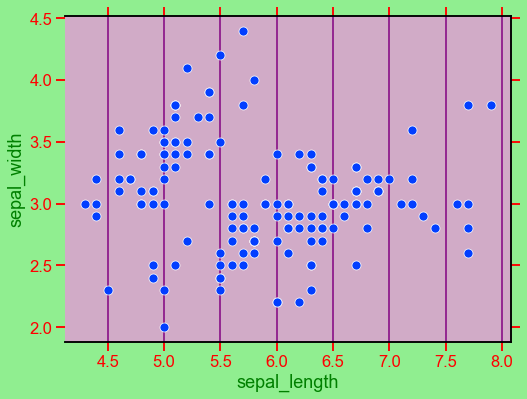

In [42]:
# for color can use HEX, e.g. #2c2cc7

df = sns.load_dataset('iris')
df

plt.figure(figsize=(8,6))
sns.set_context('talk')
graph = sns.scatterplot(
	x='sepal_length', y='sepal_width', data=df
)
sns.set_style('whitegrid', {
	# COLOURS
	'figure.facecolor': 'lightgreen', # outside figure background color
	'axes.labelcolor': 'green', # white intensity of axes labels ('0.5') OR input color name
	'axes.facecolor': '#d1abc7', # inside figure background color
	'xtick.color': 'red', # white intensity of x axes ticks ('0.5') OR input color name
	'ytick.color': 'red', # white intensity of y axes ticks ('0.5') OR input color name
	'axes.edgecolor': 'black', # colour of the axes outside square border
	'grid.color': 'purple',

	'axes.axisbelow': True, # Bool: position figure x and y axis below or above the actual data? 
	'grid.linestyle': '-', 
	'xtick.top': True, 'xtick.bottom': True, # Draw individual ticks for x axis
	'ytick.right': True, 'ytick.left': True, 
	'axes.grid': True, # Remove axes grid
	'axes.spines.left': False,
	# 'ytick.color': 'grey' # Only change color of ticks and their values, without axes spine
	# 'axes.edgecolor': 'grey' # Only change color of axes spine
})
graph.yaxis.grid() # Remove horisontal axis

## Global API

In matplotlib, we can use global API (invoking functions at the level of the module `pyplot`)

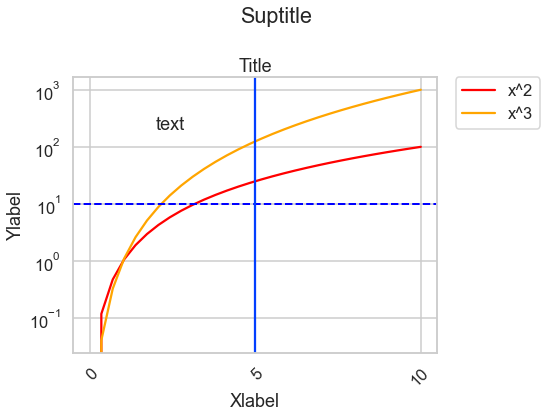

In [45]:
# OOP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change figure size
plt.figure(figsize=(8,6))
x = np.linspace(0, 10, 30)
plt.plot(x, x**2, color='red')
plt.plot(x, x**3, color='orange')
sns.set_style('whitegrid')

# Figure title
plt.title('Title')
plt.suptitle('Suptitle')

# Axes labels
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

# Axes ticks
plt.xticks([0, 5, 10], rotation = 45, ha='right', rotation_mode='anchor')

# Log scale
plt.yscale('log')

# Create a legend outside of the figure box
plt.legend(['x^2', 'x^3'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Horisontal / vertical line
plt.axhline(
	10, 
	color='blue', 
	linewidth=2, 
	ls='--' # linestyle = 'solid', 'dotted'
) # Horisontal
plt.axvline(5)

# Write text on the graph
plt.text(2,200, s='text')

# Use if headings overlap
plt.tight_layout()

<AxesSubplot:>

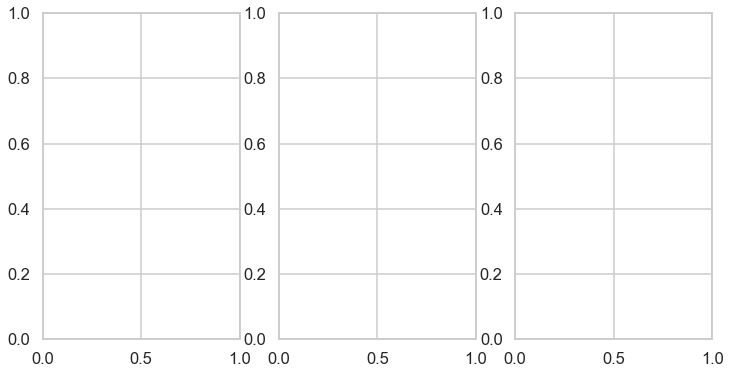

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1) # rows, columns, panel selected

plt.subplot(1, 3, 2)

plt.subplot(1,3,3)

## OOP

In matplotlib, we can use OOP interface by creating objects. 

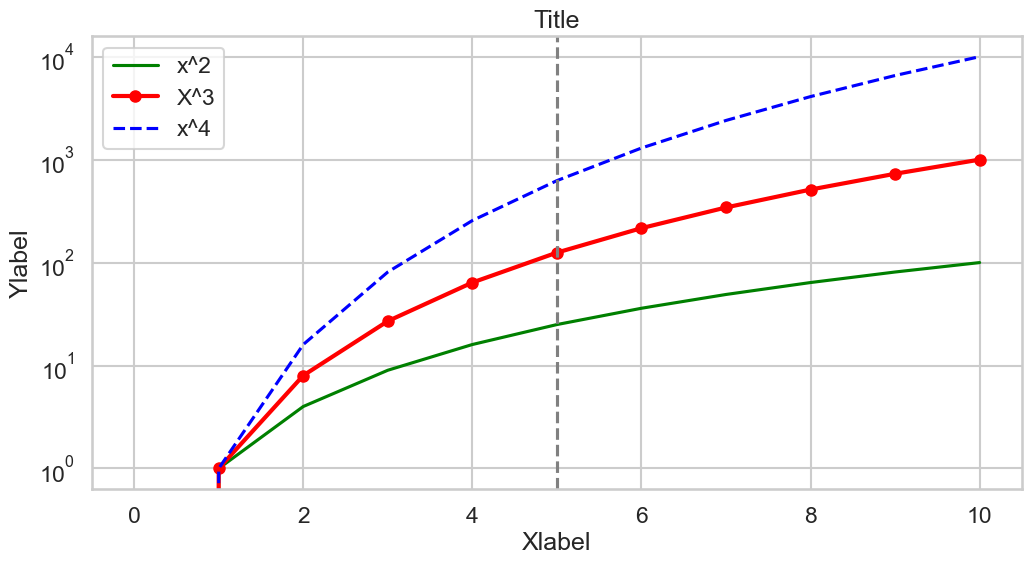

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(12,6))

x = np.arange(0, 11, 1)
graph1 = sns.lineplot(x=x, y=x**2, color='green', label='x^2')
axes.plot(x, x**3, color='red', linewidth=3, marker='o', markersize=8, label='X^3')
axes.plot(x, x**4, color='blue', label='x^4', linestyle='--')

# Change figure size
fig.set_dpi(100)
# fig.set_size_inches(7,5)

# Figure title
axes.set_title('Title')

# Axes labels
axes.set_xlabel('Xlabel')
axes.set_ylabel('Ylabel')

# Axes ticks


# Log scale
axes.set_yscale('log')

# Create a legend outside of the figure box
axes.legend()

# Horisontal / vertical line
axes.axvline(5, color='grey', linestyle='dashed')

# Write text on the graph


# Use if headings overlap


plt.show()

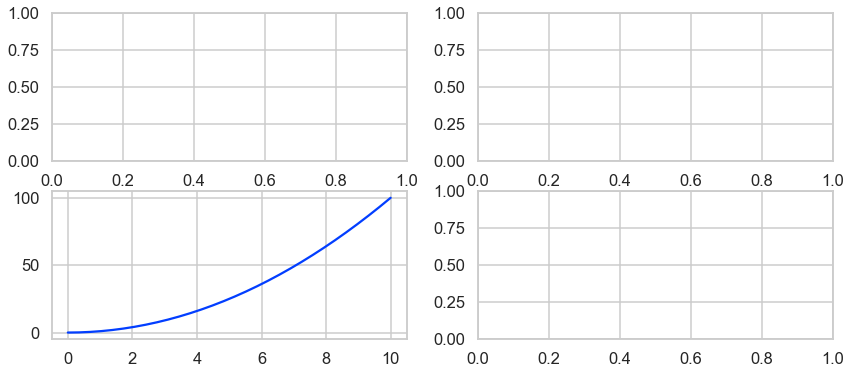

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

x = np.linspace(0, 10, 30)
axes[1,0].plot(x, x**2)

## Tabular representations of data

**Contingency table** (crosstabulation, cross table) - a useful way to summarise two categorical variables. 
- Top row = category 1, 
- left column = category 2, 
- cells = frequencies. 

<img src="Media/Crosstabulation.png" width="530"/>

<img src="Media/Contingency-table.png" width="400"/>

**Frequency distribution table**

Like a histogram in tabular form. 

<img src="Media/Frequency_distribution_table.png" width="250"/>

**Stem-and-leaf diagram**

<img src="Media/Stem_and_leaf.png" width="300"/>

**Two-way frequency table**
- Two-way relative frequency table if it’s expressed in percentage
you take two variables, one variable occupies column while another occupies rows, then calculate frequency

<img src="Media/Two-way_frequency_table.png" width="500"/>


## Dotplot

The number of dots in the plot equals to the number of observations. 

Variables: X - categorical, Y - numerical. 

<img src="Media/Dotplot.png" width="500"/>

<img src="Media/Dotplot_2.png" width="500"/>

## Scatterplot

Variables: X, Y - numeric continuous; 

Text(0.5, 1.0, 'Sepal dimensions')

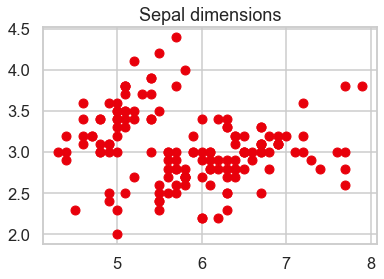

In [76]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
plt.plot(flowers_df['sepal_length'], flowers_df['sepal_width'], 'or')
# plt.plot('sepal_length', 'sepal_width', 'or', data=flowers_df) ## alternative way of writing
plt.title('Sepal dimensions')

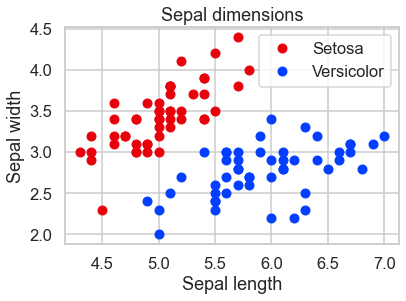

In [77]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
df2 = flowers_df[flowers_df['species'] == 'setosa']
df3 = flowers_df[flowers_df['species'] == 'versicolor']

plt.plot( df2['sepal_length'], df2['sepal_width'], 'or' )
plt.plot( df3['sepal_length'], df3['sepal_width'], 'ob' )

plt.title('Sepal dimensions')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa', 'Versicolor'])

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sepal dimensions')

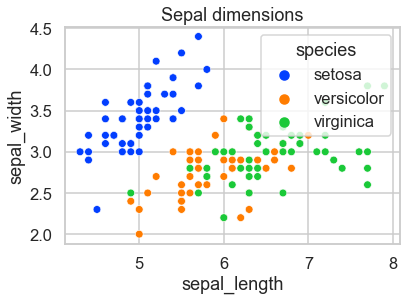

In [78]:
# SEABORN

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')

sns.scatterplot(
	flowers_df['sepal_length'], flowers_df['sepal_width'], 
	hue=flowers_df['species'], 
	s=60
)

# Alternative way to pass data:
# sns.scatterplot('sepal_length', 'sepal_width', data=flowers_df)

plt.title('Sepal dimensions')

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

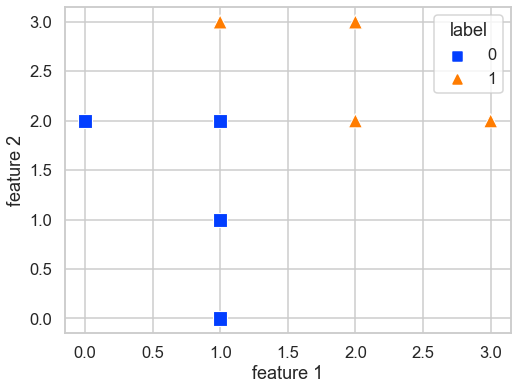

In [79]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df

plt.figure(figsize=(8,6))
sns.scatterplot( 
	'feature 1', 'feature 2', 
	data=df,
	style='label', 
	s=200, 
	hue='label',
	markers = ['s', '^'] 
	# markers={'feature 1':'s', 'feature 2': 'X'} # o, circle; s, square; ^, triangle; 
)


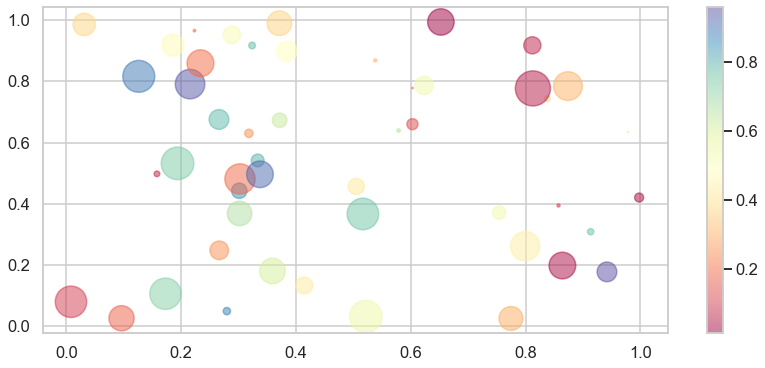

In [40]:
# Global API
N=50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.figure(figsize=(14, 6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

## Stripplot

Scatterplot where one variable is categorical. 

Good addition to violin / box plot if you want to map individual observations. 

In [ ]:
df = sns.load_dataset('iris')
df

sns.stripplot(
	x='species', y='sepal_length', data=df, 
	color='black', size=4
)

## Box (box-and-whiskers) plot

e.g. dataset {4, 4, 6, 7, 10, 11, 12, 14, 15}. Median (Q2) = 10; Q1 = 5, Q3 = 13, IQR = 13-5 = 8. 

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df = pd.DataFrame({
	'variable': [1, 2, 3, 2, 2.5, 5, 10, 3, 4, 1, 3]
})
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['variable'])

In [ ]:
df = sns.load_dataset('iris')
df

sns.boxplot(   x='species', y='sepal_length', data=df, showfliers=False )
sns.stripplot( x='species', y='sepal_length', data=df, color='black' )


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


items_df = pd.read_csv('example_datasets/CASP14_2020.csv', sep='\t');

plt.title('CASP14 results (2020)');
# sns.set_theme(style="ticks");
sns.boxplot(items_df['SUM Zscore (>0.0)'], 
			whis=[0, 100], width=.6);
sns.stripplot(items_df['SUM Zscore (>0.0)'], 
			size=4, color='black', linewidth=0);

plt.text(205, 0.05, 'AlphaFold -->', color='red'); 

### Violin plot

An enhancement to the boxplot. 

It can show the nuances in the data distributions that are hidden in the boxplot. 

However, the outliers are less visible. 

## Bar plot

Count of single categorical variable. 

<img src="Media/Bar_plots.png" width="500"/>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, oranges);
plt.plot(years, oranges, 'o--r'); 
plt.title('Yield of oranges')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked component bar graph

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples)

In [ ]:
# Barplot
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

tips_df = sns.load_dataset('tips')
sns.barplot(
	tips_df.day, tips_df.total_bill, 
	errcolor='black', errwidth=2, capsize=0.2
)

# Alternative 

# bill_avg_df = tips_df.groupby('day')[['total_bill']].mean();
# plt.bar(bill_avg_df.index, bill_avg_df.total_bill);

In [ ]:
import Bio
from Bio.Seq import Seq



dna = Seq("ATGATCTCGTAA")
rna = Seq("AUGUUCUCGUAA")

#### Plot of frequency of nucleotides / base 

import matplotlib.pyplot as plt
from collections import Counter

dna_freq = Counter(dna)

plt.bar(dna_freq.keys(), dna_freq.values())

In [ ]:
# Grouped bar plot
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(
	'day', 'total_bill', data=tips_df, 
	hue='sex', 
	log=True
)

# flip the graph
# sns.barplot('total_bill', 'day', hue='sex', data=tips_df); # here, the graph is flipped

In [ ]:
# ticks btw each log power are not equal

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib as plt

items_df = pd.read_csv('example_datasets/Hypercuboids_data.csv', sep = ',')
# print(items_df)
print(items_df.columns)
############################################################################################

fig, axes = plt.subplots(
	2, 1, 
	figsize = (8,10), 
	# sharex=True
)

plt.suptitle("Comparison of two algorithms", weight = 'bold') # Common title for all figures
plt.style.use('fivethirtyeight')

# axes[0].set_title('Comparison of runtimes of the two algorithms')
sns.barplot(
	x='sample_N', y='runtime', data=items_df, 
	hue='algorithm', 
	log=True, 
	ax = axes[0]
)
axes[0].set_xlabel("Genotypes, n")
axes[0].set_ylabel("Runtime, sec")
axes[0].get_legend().remove()
fig.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor = (0.5, 0.9))

# axes[1].set_title('Comparison of hypercuboids found by the two algorithms')
plot1 = sns.barplot(
	x='sample_N', y='hypercubes_found', data=items_df, 
	hue='algorithm', 
	log=True, 
	# legend='Hide',
	# legend = False,
	ax = axes[1]
)
axes[1].set_xlabel("Genotypes, n")
axes[1].set_ylabel("Hypercubes found")
# axes[1].legend()
axes[1].get_legend().remove()

plt.tight_layout(pad=2)

## Histogram

Shows frequencies of intervals into which the data is subdivided, while losing identities of individual observations. Count of single numerical variable. 

A subset of histogram is a **pictograph** - quantity represented by quantity of pictures: 

<img src="Media/Pictograph.png" width="300"/>

### Univariate

In [ ]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df['sepal_width'], 
	# bins=10,
	bins=np.arange(2, 5, 0.25) 
	# bins=[1, 3, 4, 4.5]
);

plt.title('Distribution of Sepal Width')


In [ ]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25), 
)

plt.hist(
	flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25)
)

In [ ]:
# stacked histogram
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
flowers_df = sns.load_dataset('iris')

plt.hist(
	[
		flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'virginica']['sepal_width']
	], 
	stacked=True, 
	bins=np.arange(2, 5, 0.25)
)

plt.title('Distribution of Sepal Width'); 
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

ages = [18, 18, 17, 20, 23, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55,]
bins = [0, 10, 20, 30, 40, 50, 60, 70]
# data = pd.read_csv('data.csv')
# ids = data['Column_name1']
# ages = data['Column_name2']

plt.hist(
	ages, 
	# bins = 30, 
	bins = bins,
	edgecolor = 'black', 
	# log=True
)

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.axvline( # Plots a vertical line
	29, color='#fc4f30', label='Age median', 
	linewidth=2
) 

plt.legend()

# plt.tight_layout()

### Bivariate

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	
	# log_scale=(True, False)
)



In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	kind='kde'
	
	# log_scale=(True, False)
)



## Density plot (KDE)

Density plot (kernel density estimate) - smoothed histogram. 

Density curves show probability. The area under the curve equals to 100% of all possibilities. 
Like histogram but:
- Y axis is not frequency, but percentage of the total amount
- There are infinite number of infinitely-small bars


In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.kdeplot(
	x='sepal_length', data=iris, hue='species', 
	lw=7
)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

graph = sns.displot(
	data=df, x='bill_length_mm', 
	hue='species', col='sex',
	# binwidth=0.6, 
	kind='kde'
)

graph.set_axis_labels('Bill length (mm)', 'Count')


## Line plot

plt.plot arguments: 
- ```color, c```: set the color of the line 
- ```linestyle, ls```: 	choose between a solid or dashed line
- ```linewidth, lw```:	set the width of a line
- ```markersize, ms```:	set the size of markers
- ```markeredgecolor, mec```:	set the edge color for markers
- ```markeredgewidth, mew```:	set the edge width for markers
- ```markerfacecolor, mfc```: set the fill color for markers
- ```alpha```: opacity of the plot
- ```fmt = '[marker][line][color]'```: e.g. fmt=[s--b]; this argument provides a shorthand for specifying the line style, marker, and line colour

In [ ]:
# MATPLOTLIB

import pandas as pd
import matplotlib.pyplot as plt
# to ensure that plots are embedded within notebook cells, not as pop-ups
%matplotlib inline


df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})


plt.plot(df['years'], df['yield_apples'], marker='o', color='black', ls='-', lw=3, mew=5, mec='navy') # plot line 1
plt.plot(df['years'], df['yield_oranges'], marker='x', color='red') # plot line 2
plt.xlabel('Year'); plt.ylabel('Yield, tons per hectare') # print axis labels
plt.title('Crop Yields in Kanto') # print title
plt.legend(['Apples', 'Oranges'])

In [ ]:
# MATPLOTLIB + SEABORN STYLE

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'yield_cucumbers': np.random.uniform(0.7, 1, 6), 
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})



sns.set_style('whitegrid') # 'darkgrid'
plt.plot(df['years'], df['yield_apples'], 's-b')
plt.plot(df['years'], df['yield_oranges'], 'o--r') # 'or' = dot plot 
# plt.plot(df['years'], df['yield_cucumbers'], 'or')

In [ ]:
# SEABORN
# Multi-subplot line plots

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#############################################################################################
#####   Data processing   ###################################################################
#############################################################################################
df = pd.read_csv('example_datasets/IPDS7_hyperrectangles_2.tsv', skiprows=1, sep='\t')

# Filter data
df = df[(df['Dimension'] != 'Total') & (df['IPDS7 sample size'] <= 400)]
# Print a new column with sum of 'Runtime (s)' for each group in 'IPDS7 sample size'
df['runtime_sum'] = df.groupby(['IPDS7 sample size'])['Runtime (s)'].transform('sum')
df['runtime_percent'] = (df['Runtime (s)'] / df['runtime_sum']) * 100

df

#############################################################################################
#####   Visualisation   #####################################################################
#############################################################################################
fig, axes = plt.subplots(
	4, 1, 
	figsize = (6,10), 
	sharex=True,
)

# Common varialbes
Samples = [100, 200, 300, 400]
ylabel="% of runtime"
yticks = [0, 20, 40, 60, 80, 100]
scatter_size = 90

plt.suptitle("% runtime per each dimension in different sample sizes (N)", weight = 'bold') # Common title for all figures
sns.set_style('darkgrid')
plt.tight_layout(pad=2)

sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 100], ax = axes[0] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 200], ax = axes[1] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 300], ax = axes[2] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 400], ax = axes[3] )

for i in range(0, len(Samples)):
	axes[i].set_ylabel(ylabel)
	axes[i].set_yticks(ticks=yticks)
	axes[i].set_title(f"N = {Samples[i]}", weight='bold')



In [ ]:
df = sns.load_dataset('flights')

graph = sns.lineplot(x='year', y='passengers', data=df, hue='month')
graph.set(yscale='log')
graph.set(xticks=range(1950, 1960, 3))


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

df = pd.DataFrame({
	'Time': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], 
	'Value': [0, 0, 0, 5, 6, 7, 10, 11, 8, 15, 14, 12]
})

sns.lineplot(
	x='Time', y='Value', data=df, 
	err_style='bars', 
	err_kws={'capsize':10}
)


In [ ]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

def TimeSeriesPerMonth(months: list):
	df = sns.load_dataset('flights')
	df2 = df[df['month'].isin(months)]
	sns.lineplot(x='year', y='passengers', data=df2, hue='month', legend=False)
	sns.set_style('whitegrid')
	for i in months:
		df3 = df2[(df2['month'] == i) & (df2['year'] == 1960)]
		plt.text(x=1960+0.1, y=df3['passengers'].iloc[0], s=i)

TimeSeriesPerMonth(['Jan', 'Apr', 'Jul'])

## Regplot

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

x = np.arange(0, 10+1, 1)
graph1 = sns.regplot(x, x*2)
graph1.set_title('Graph 1')
plt.show()

graph2 = sns.regplot(x, x**2, lowess=True)
graph2.set_title('Graph 2')
plt.show()

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Linear correlation
## The two variables change at the same rate

x = np.arange(0, 10+1, 1)
y = x + np.random.uniform(0, 1, np.shape(x))
graph1 = sns.regplot(x, y)
graph1.set_title('Linear correlation')
plt.show()

# Non-linear correlation
## Two variables change at different rates
x = np.arange(0, 10+1, 1)
y = (x**2) * np.random.uniform(0.5, 1, np.shape(x))
graph2 = sns.regplot(x, y, lowess=True)
graph2.set_title('Non-linear correlation')
plt.show()

# Monotonic 
## A relationship where two variables have the same sign of change, i.e. move in the same direction
## E.g. monotonic non-linear

## Jointplot

In [ ]:
import seaborn as sns

df = sns.load_dataset('penguins')
df

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df)

In [ ]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde', shade=True)

## Pairplot

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

sns.pairplot(titanic.select_dtypes(['number']), hue='pclass')

## Cluster map

In [ ]:
iris = sns.load_dataset('iris')

sns.clustermap(iris.drop('species', axis=1))

## Pie chart

Each slide = category. 

Size of slice = frequency. 

In [ ]:
# Quick visualisation
import pandas as pd


df = pd.DataFrame({
	'Species': ['Setosa', 'Setosa', 'Virginica', 'Setosa', 'Sepal', 'Virginica'], 
	'Sepal_length': [10, 11, 50, 70, 12, 51], 
	'Sepal_width': [100, 101, 50, 40, 99, 52]
})

# Quick pie chart - count of entries
df['Species'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.0f%%')

## Heatmap

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd

flights = sns.load_dataset('flights')
flights

In [ ]:
# Heatmap

flights = sns.load_dataset('flights')


sns.heatmap(
	flights.pivot('month', 'year', 'passengers')
)
# heatmap arguments: 
## annot = True: displays the actual values
## cmap='Blues': changes the color palette
plt.title('No. of passengers (1000s)')


In [ ]:
flights = sns.load_dataset('flights')
flights['month'] = flights['month'].astype(
	str
) 

flights = flights.pivot('month', 'year', 'passengers')
flights 

a = [i for i in range(1949, 1961)]
b = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']

flights = flights.reindex(index=b, columns=a)
sns.heatmap(flights)

In [ ]:
import seaborn as sns
import numpy as np

example_four = sns.load_dataset('flights')
example_four = example_four.pivot('month', 'year', 'passengers')
# display_four = sns.heatmap(example_four)

sns.heatmap(
	example_four, 
	annot=True, 
	fmt='d'
)

In [ ]:
# A more complex heatmap, 
# where we perform alphanumerical sorting of the columns

df = pd.DataFrame({
	'var1': ['X1','X1','X1', 'X2','X2','X2', 'X10','X10','X10', 'S1','S1','S1' ],
	'var2': ['Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10'], 
	'value': [5,6,8, 10,10,10, 15,17,16, 20,20,20]
})
df

def sorted_nicely( l ): 
	import re
	""" Sort the given iterable in the way that humans expect.""" 
	convert = lambda i: int(i) if i.isdigit() else i 
	alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
	print(alphanum_key)
	return sorted(l, key = alphanum_key)

pivot = df.pivot('var1', 'var2', 'value')

y_axis = list(df['var1'].unique()); print(y_axis)
x_axis = list(df['var2'].unique()); print(x_axis)

pivot = pivot.reindex(y_axis, ['Y1','Y2','Y10'])

sns.heatmap(
	pivot
)


In [ ]:
# Fitness landscape with one fitness peak

import numpy as np
import matplotlib.pyplot as plt

# number of data points
N = 1000000

x = np.random.randn(N)
y = np.random.randn(N)
plt.hist2d(x,y,bins=100)
plt.show()



In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N = 100000
peak1 = -1
peak2 = 3


y = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
Y = np.concatenate([y, y2])

x = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
X = np.concatenate([x, x2])

plt.hist2d(X, Y, bins=100)

plt.show()



In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N1 =  4000000
N2 = 10000000
peak1 = -1
peak2 = 2

parameter = 1

y = np.random.normal(  peak1, parameter, N1)
y2 = np.random.normal( peak2, parameter, N2)
Y = np.concatenate([y, y2])

x = np.random.normal(  peak1, parameter, N1)
x2 = np.random.normal( peak2, parameter, N2)
X = np.concatenate([x, x2])

# plt.figure(figsize=(14, 14))
plt.hist2d(X, Y, bins=100, cmap='viridis')
matplotlib.cm.get_cmap(name='viridis')


# plt.show()
# plt.savefig(
# 	f'Figure name.jpg', format='jpg', 
# 	dpi=1000, 
# 	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
# )

In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000000
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
y3 = np.random.normal(peak3[1], 1, N)
y4 = np.random.normal(peak4[1], 1, N)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()


In [ ]:
# Fitness landscape with multiple peaks and lots of noise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 10000
N2 = int(10000/2)
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N2)
x2 = np.random.normal(peak2, 1.5, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
# x5 = np.random.uniform(-4, 4, 100000)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N2)
y2 = np.random.normal(peak2, 1.5, N)
y3 = np.random.normal(peak3[1], 1.2, N)
y4 = np.random.normal(peak4[1], 1.3, N)
# y5 = np.random.uniform(-4, 4, 100000)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()

## Catplot

In [ ]:
import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')

df

graph = sns.catplot(
	x='diet', y='pulse', 
	col='kind', col_wrap=2, 
	height=3, data=df)
df

In [ ]:
# only plot selected fragments

import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')
df

graph = sns.catplot(x='diet', y='pulse', col='kind', col_wrap=2, height=3, data=df, order=['no fat'])
graph.fig.suptitle('Title', y=1.05)

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='strip' ) # kind='strip' is default

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(
	x='sex', y='total_bill', col='smoker', 
	data=df_test, kind='swarm' ) 

In [ ]:
g = sns.catplot(
	x='sex', y='total_bill', col='day', data=df_test, 
	kind='box', col_wrap=2
)

g.set_titles(template='{col_name}')

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, kind='box' ) # boxplot / box-and-whiskers plot


g.set_titles(template='{col_name}')

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, 
	kind='box',
	showfliers=False ) # boxplot / box-and-whiskers plot

g.set_titles(template='{col_name}')

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='violin' ) 

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='boxen' ) 

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='point' ) 

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='bar', errwidth=3, capsize=0.25) 

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', col='smoker', data=df_test, kind='count' ) 

## Multiple plots

In [ ]:
# Plotting multiple charts in a grid

import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

flowers_df = sns.load_dataset('iris')
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
yield_oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908]
years = [2010, 2011, 2012, 2013, 2014, 2015]
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
tips_df = sns.load_dataset('tips')
img = Image.open('example_datasets/chart.jpg'); 

# plt.style.use('fivethirtyeight')

setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

flights_df = sns.load_dataset('flights')


# fig, axes = plt.subplots(2, 3, figsize=(16,8));
fig, axes = plt.subplots(
	2, 3, 
	figsize = (16,8), 
	# sharex=True
)


# Linegraph
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].set_title('Crop yields')
axes[0,0].legend(['Apples', 'Oranges'])

# Scatterplot
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(flowers_df.sepal_length, 
				flowers_df.sepal_width, 
				hue=flowers_df.species, 
				s=100, 
				ax = axes[0,1])

# Histogram
axes[0,2].set_title('Distribution of Sepal Width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
				bins = np.arange(2, 5, 0.25), 
				stacked=True); 
axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']); 

# Barplot
axes[1,0].set_title('Restaurant bills')
sns.barplot('day', 'total_bill', hue='sex', data=tips_df, ax=axes[1,0]);

# Heatmap
axes[1,1].set_title('Flight traffic')
sns.heatmap(
	flights_df.pivot('month', 'year', 'passengers'), ax=axes[1,1], cmap='Blues'
)

# Plot an image
axes[1,2].set_title('Data Science Meme')
axes[1,2].imshow(img)
axes[1,2].grid(False)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout(pad=2)



# For further references go here - cheatsheet:
# https://jovian.ai/aakashns/dataviz-cheatsheet


## 3D

In [ ]:
# Empty grid
# If you run this in separate .py file, it will be interactive

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (3, 3)
# plt.rcParams['figure.dpi'] = 150


# Create 3D axes
# Way 1 - without specifying size
ax = plt.axes(projection='3d')
# Way 2 - specifying size
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

# Rotation
ax.view_init(azim=30, elev=40)

# label axes:
ax.set_title('Figure title')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# To make sure that comments before plot don't show
plt.show()

In [ ]:
# 3D scatterplot 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (6, 4)
# plt.rcParams['figure.dpi'] = 150

ax = plt.axes(projection='3d')

# Normal distribution: 
x = np.random.normal(size = 500)
y = np.random.normal(size = 500)
z = np.random.normal(size = 500)
# Can Use random data points: 
# x = np.random.randint(0, 100, (500,))
# y = np.random.randint(0, 100, (500,))
# z = np.random.randint(0, 100, (500,))


# Two ways to plot: 
ax.scatter(
	x, y, z, 
	# color items by their position from the center:
	c = np.linalg.norm([x, y, z], axis=0), 
	# change dots' size:
	s = 13, 
	marker = 'v', # Use marker figure
	alpha = 0.9 # Transparency
)
# ax.scatter3D(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the figure statically
ax.view_init(45, 15); # (elevation[deg], rotation_horison[deg])

In [ ]:
# Pseudo-scatter plot = line plot without connecting each data point
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x_data = np.arange(0, 50, 5)
y_data = np.arange(0, 50, 5)
z_data = x_data * y_data

# Two options
ax.scatter(x_data, y_data, z_data)
# ax.plot(x_data, y_data, z_data)

plt.show()

In [ ]:
# spring

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



ax = plt.axes(projection='3d')

z = np.linspace(0, 30, 100) # (start, stop, N)
x = np.sin(z)
y = np.cos(z)
# or create expandable figure:
# omega = 2
# x = np.cos(omega*z)
# y = np.sin(omega*z)

ax.plot3D(
	x, y, z, 
	lw=4, # line thickness
)

plt.show()

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
# alternative:
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

x = np.linspace(0, 10, 50)
z = np.cos(x)

# Two options: 
ax.plot(x, x, z)


plt.show()

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

x = np.arange(0, 50, 0.1)
y = np.arange(0, 50, 0.1)
z = np.sin(x) * np.cos(y)

ax.plot(x, y, z)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3D wireframe

N = 10

ax = plt.axes(projection='3d'); 

def function_z(x, y):
	return 50 - (x**2 + y**2)

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
Z = function_z(X, Y)

ax.plot_wireframe(
	X, Y, Z, 
	color='black', 
	lw=1
)

In [ ]:
# 3D surface plot

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

def function_z(x, y):
	return 50 - (x**2 + y**2)

N = 50

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
# print(X)
Z = function_z(X, Y)
print(Z.shape)

ax.plot_surface(X, Y, Z)

plt.show()

In [ ]:
# cone

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

def z_function(x, y):
	return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Convert vectors into matrices
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax.plot_surface(X, Y, Z)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x = np.arange(-5, 5, 0.1)
y = x

X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

ax.plot_surface(
	X, Y, Z, 
	cmap = 'plasma', # Add colour map
)
# Rotation
ax.view_init(azim=30, elev=40)

plt.show()

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

ID = 'PY431702'

def f(x, y):
    return 1/ (1 + x*x + y*y)

x = np.linspace(-2.5, 2.5, 30)
y = np.linspace(-2.5, 2.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')


ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title(f'Fitness landscape with one peak \nID {ID}');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');

# To remove all axes
# ax.set_axis_off()

# plt.savefig('figure name.jpg', format='jpg', dpi=1200)


In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x, y):
    # return np.sin(np.sqrt(x ** 2 + y ** 2))
    # return 1/ (1 + x*x + y*y)
	# return (np.sin(5*x) * np.cos(5*y))/5
    return (np.sin(x) * np.cos(y/1.9))
    
    # return 2.71828**(-0.9*(x**2 + 0.5*(x-y)**2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                # cmap='viridis', edgecolor='none')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title('surface');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');


In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
# Create figure. 
fig = plt.figure() 
ax = fig.gca(projection = '3d') 
# Generate example data. 
R, Y = np.meshgrid(np.arange(0, 500, 0.5), np.arange(0, 40, 0.5)) 
z = 0.1 * np.abs(np.sin(R/40) * np.sin(Y/6)) 
# Plot the data. 
surf = ax.plot_surface(R, Y, z, cmap='jet', linewidth=0) 
fig.colorbar(surf) 
# Set viewpoint. 
ax.azim = -160 
ax.elev = 30 
# Label axes. 
ax.set_xlabel('Along track (m)') 
ax.set_ylabel('Range (m)') 
ax.set_zlabel('Height (m)') 


